In [150]:
import nsepy as nse
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly.offline import iplot
import plotly as py 
import cufflinks as cff
from numpy import sqrt,log
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import tensorflow
import warnings
warnings.filterwarnings("ignore")

In [2]:
symbol1="reliance"
nse_rel1=nse.get_history(symbol1,start=date(2012,5,22),end=date(2022,5,22))

In [3]:
nse_rel1.to_csv("relaince_data.csv")

In [4]:
symbol2="tcs"
nse_rel2=nse.get_history(symbol2,start=date(2012,5,22),end=date(2022,5,22))

In [5]:
nse_rel2.to_csv("tcs_data.csv")

# Relaince Data

In [2]:
df1=pd.read_csv("relaince_data.csv")
df1

Date    Symbol Series  Prev Close     Open     High      Low  \
0     2012-05-22  RELIANCE     EQ      695.50   704.60   704.60   688.75   
1     2012-05-23  RELIANCE     EQ      691.10   685.20   689.95   679.55   
2     2012-05-24  RELIANCE     EQ      686.85   694.00   700.00   686.10   
3     2012-05-25  RELIANCE     EQ      695.30   695.00   695.30   688.55   
4     2012-05-28  RELIANCE     EQ      691.20   692.00   703.00   692.00   
...          ...       ...    ...         ...      ...      ...      ...   
2470  2022-05-16  RELIANCE     EQ     2426.60  2434.45  2481.00  2416.65   
2471  2022-05-17  RELIANCE     EQ     2427.20  2435.10  2539.90  2432.00   
2472  2022-05-18  RELIANCE     EQ     2529.15  2539.65  2570.00  2508.25   
2473  2022-05-19  RELIANCE     EQ     2538.35  2484.00  2512.50  2466.05   
2474  2022-05-20  RELIANCE     EQ     2479.85  2512.50  2644.40  2502.00   

         Last    Close     VWAP    Volume      Turnover  Trades  \
0      690.00   691.10   696.04   2938047  2.044993e+14   57806   
1      689.00   686.85   686.04   2583348  1.772290e+14   51559   
2      699.95   695.30   693.06   2399818  1.663208e+14   54052   
3      690.65   691.20   691.44   3085023  2.133111e+14   55663   
4      701.00   701.65   700.04   2575102  1.802680e+14   47165   
...       ...      ...      ...       ...           ...     ...   
2470  2428.05  2427.20  2444.28   6201594  1.515841e+15  244925   
2471  2533.50  2529.15  2501.03   7638666  1.910453e+15  278980   
2472  2542.25  2538.35  2535.87   7973235  2.021911e+15  293806   
2473  2477.90  2479.85  2494.14   6783641  1.691936e+15  266213   
2474  2628.85  2624.45  2569.30  10057508  2.584080e+15  366921   

      Deliverable Volume  %Deliverble  
0                1828277       0.6223  
1                1513352       0.5858  
2                1402172       0.5843  
3                1938658       0.6284  
4                1684288       0.6541  
...                  ...          ...  
2470             3089139       0.4981  
2471             4085578       0.5349  
2472             3948750       0.4953  
2473             3713450       0.5474  
2474             5198311       0.5169  

[2475 rows x 15 columns]

In [3]:
2427

2427

# TCS Data

In [4]:
df2=pd.read_csv("tcs_data.csv")
df2

Date Symbol Series  Prev Close    Open     High      Low     Last  \
0     2012-05-22    TCS     EQ     1209.20  1221.0  1240.00  1213.00  1239.00   
1     2012-05-23    TCS     EQ     1224.05  1233.0  1235.55  1214.10  1220.90   
2     2012-05-24    TCS     EQ     1225.15  1225.0  1228.95  1207.10  1223.00   
3     2012-05-25    TCS     EQ     1221.45  1212.1  1225.00  1209.10  1223.15   
4     2012-05-28    TCS     EQ     1220.80  1224.0  1230.00  1215.05  1228.90   
...          ...    ...    ...         ...     ...      ...      ...      ...   
2470  2022-05-16    TCS     EQ     3414.90  3415.0  3430.00  3366.60  3385.00   
2471  2022-05-17    TCS     EQ     3376.80  3370.0  3467.00  3350.40  3466.75   
2472  2022-05-18    TCS     EQ     3451.60  3465.0  3495.00  3443.05  3455.00   
2473  2022-05-19    TCS     EQ     3448.80  3397.0  3405.00  3230.00  3271.90   
2474  2022-05-20    TCS     EQ     3261.95  3310.0  3313.90  3270.05  3299.00   

        Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0     1224.05  1222.33  1180458  1.442907e+14   27043              705131   
1     1225.15  1224.11  1081403  1.323758e+14   35494              696897   
2     1221.45  1217.99   602837  7.342466e+13   35630              303432   
3     1220.80  1218.72   457523  5.575927e+13   27072              267766   
4     1224.70  1221.25   395097  4.825108e+13   18554              223269   
...       ...      ...      ...           ...     ...                 ...   
2470  3376.80  3399.01  1195813  4.064579e+14   84979              698049   
2471  3451.60  3410.54  1754076  5.982349e+14  126169             1022602   
2472  3448.80  3467.64  1866781  6.473332e+14  114108             1166592   
2473  3261.95  3300.30  4642963  1.532318e+15  377211             2952123   
2474  3293.00  3291.06  3065125  1.008750e+15  157647             1971441   

      %Deliverble  
0          0.5973  
1          0.6444  
2          0.5033  
3          0.5853  
4          0.5651  
...           ...  
2470       0.5837  
2471       0.5830  
2472       0.6249  
2473       0.6358  
2474       0.6432  

[2475 rows x 15 columns]

In [4]:
df1.shape,df2.shape

((2475, 15), (2475, 15))

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2475 non-null   object 
 1   Symbol              2475 non-null   object 
 2   Series              2475 non-null   object 
 3   Prev Close          2475 non-null   float64
 4   Open                2475 non-null   float64
 5   High                2475 non-null   float64
 6   Low                 2475 non-null   float64
 7   Last                2475 non-null   float64
 8   Close               2475 non-null   float64
 9   VWAP                2475 non-null   float64
 10  Volume              2475 non-null   int64  
 11  Turnover            2475 non-null   float64
 12  Trades              2475 non-null   int64  
 13  Deliverable Volume  2475 non-null   int64  
 14  %Deliverble         2475 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 290.2+

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2475 non-null   object 
 1   Symbol              2475 non-null   object 
 2   Series              2475 non-null   object 
 3   Prev Close          2475 non-null   float64
 4   Open                2475 non-null   float64
 5   High                2475 non-null   float64
 6   Low                 2475 non-null   float64
 7   Last                2475 non-null   float64
 8   Close               2475 non-null   float64
 9   VWAP                2475 non-null   float64
 10  Volume              2475 non-null   int64  
 11  Turnover            2475 non-null   float64
 12  Trades              2475 non-null   int64  
 13  Deliverable Volume  2475 non-null   int64  
 14  %Deliverble         2475 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 290.2+

In [15]:
df1.describe()

Prev Close         Open         High          Low         Last  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean   1266.803778  1268.453697  1282.907879  1253.479212  1267.483556   
std     513.836120   514.959741   520.998453   508.417884   514.508708   
min     685.250000   677.000000   689.950000   673.400000   680.150000   
25%     900.575000   900.000000   909.675000   890.000000   901.125000   
50%    1028.700000  1028.000000  1038.750000  1018.000000  1028.150000   
75%    1445.225000  1451.600000  1467.375000  1431.400000  1446.700000   
max    2819.850000  2856.150000  2856.150000  2786.100000  2810.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  2475.000000  2475.000000  2.475000e+03  2.475000e+03  2.475000e+03   
mean   1267.583152  1268.433046  6.645541e+06  9.612772e+14  1.591152e+05   
std     514.431777   514.732763  6.268444e+06  1.174009e+15  1.342050e+05   
min     685.250000   686.040000  1.110540e+05  9.037442e+12  3.338000e+03   
25%     900.650000   899.805000  2.917764e+06  2.725935e+14  7.490300e+04   
50%    1028.950000  1029.420000  4.650008e+06  4.985133e+14  1.145530e+05   
75%    1445.525000  1448.945000  8.005466e+06  1.217855e+15  2.020415e+05   
max    2819.850000  2823.910000  6.523089e+07  1.473434e+16  1.428490e+06   

       Deliverable Volume  %Deliverble  
count        2.475000e+03  2475.000000  
mean         2.947808e+06     0.498465  
std          2.119741e+06     0.122228  
min          3.174100e+04     0.114800  
25%          1.583865e+06     0.418100  
50%          2.365643e+06     0.511700  
75%          3.583934e+06     0.585650  
max          1.919505e+07     0.832700

In [16]:
df2.describe()

Prev Close         Open         High          Low         Last  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean   2381.531455  2383.193273  2407.999394  2357.136263  2382.484081   
std     604.647737   605.273762   609.809336   599.927660   604.628556   
min    1185.900000  1195.000000  1204.400000  1055.000000  1186.600000   
25%    2045.300000  2049.925000  2071.450000  2022.350000  2046.975000   
50%    2361.700000  2362.000000  2384.000000  2340.000000  2361.000000   
75%    2624.575000  2623.950000  2650.300000  2600.000000  2624.400000   
max    4019.150000  4033.950000  4043.000000  3980.000000  4025.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  2475.000000  2475.000000  2.475000e+03  2.475000e+03    2475.000000   
mean   2382.373394  2382.705697  1.999562e+06  4.866117e+14   95476.522424   
std     604.465431   604.762019  1.828393e+06  4.940570e+14   63002.706356   
min    1185.900000  1188.570000  2.801700e+04  4.173452e+12    1332.000000   
25%    2045.575000  2047.175000  9.315680e+05  2.035271e+14   50401.000000   
50%    2361.900000  2361.630000  1.532249e+06  3.489032e+14   80730.000000   
75%    2625.375000  2625.615000  2.544762e+06  6.255008e+14  123542.000000   
max    4019.150000  4010.330000  4.403358e+07  1.268362e+16  704881.000000   

       Deliverable Volume  %Deliverble  
count        2.475000e+03  2475.000000  
mean         1.099564e+06     0.586049  
std          9.758135e+05     0.125392  
min          7.765000e+03     0.121400  
25%          5.734580e+05     0.505800  
50%          9.021430e+05     0.595300  
75%          1.384826e+06     0.681300  
max          3.155626e+07     0.899300

In [18]:
df1.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [19]:
df2.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [5]:
df1=df1.rename(columns={"Deliverable Volume":"Deliverablevolume","%Deliverble":"Deliverable"})
df2=df2.rename(columns={"Deliverable Volume":"Deliverablevolume","%Deliverble":"Deliverable"})

In [220]:
df1.duplicated().sum(),df2.duplicated().sum().sum()

(0, 0)

In [23]:
print(plt.style.available)
plt.style.use('seaborn-deep')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [221]:
df_open=pd.DataFrame()
df_open["Relaince"]=pd.Series(df1["Open"])
df_open["TCS"]=pd.Series(df2["Open"])
df_open["Date"]=pd.Series(df1["Date"])

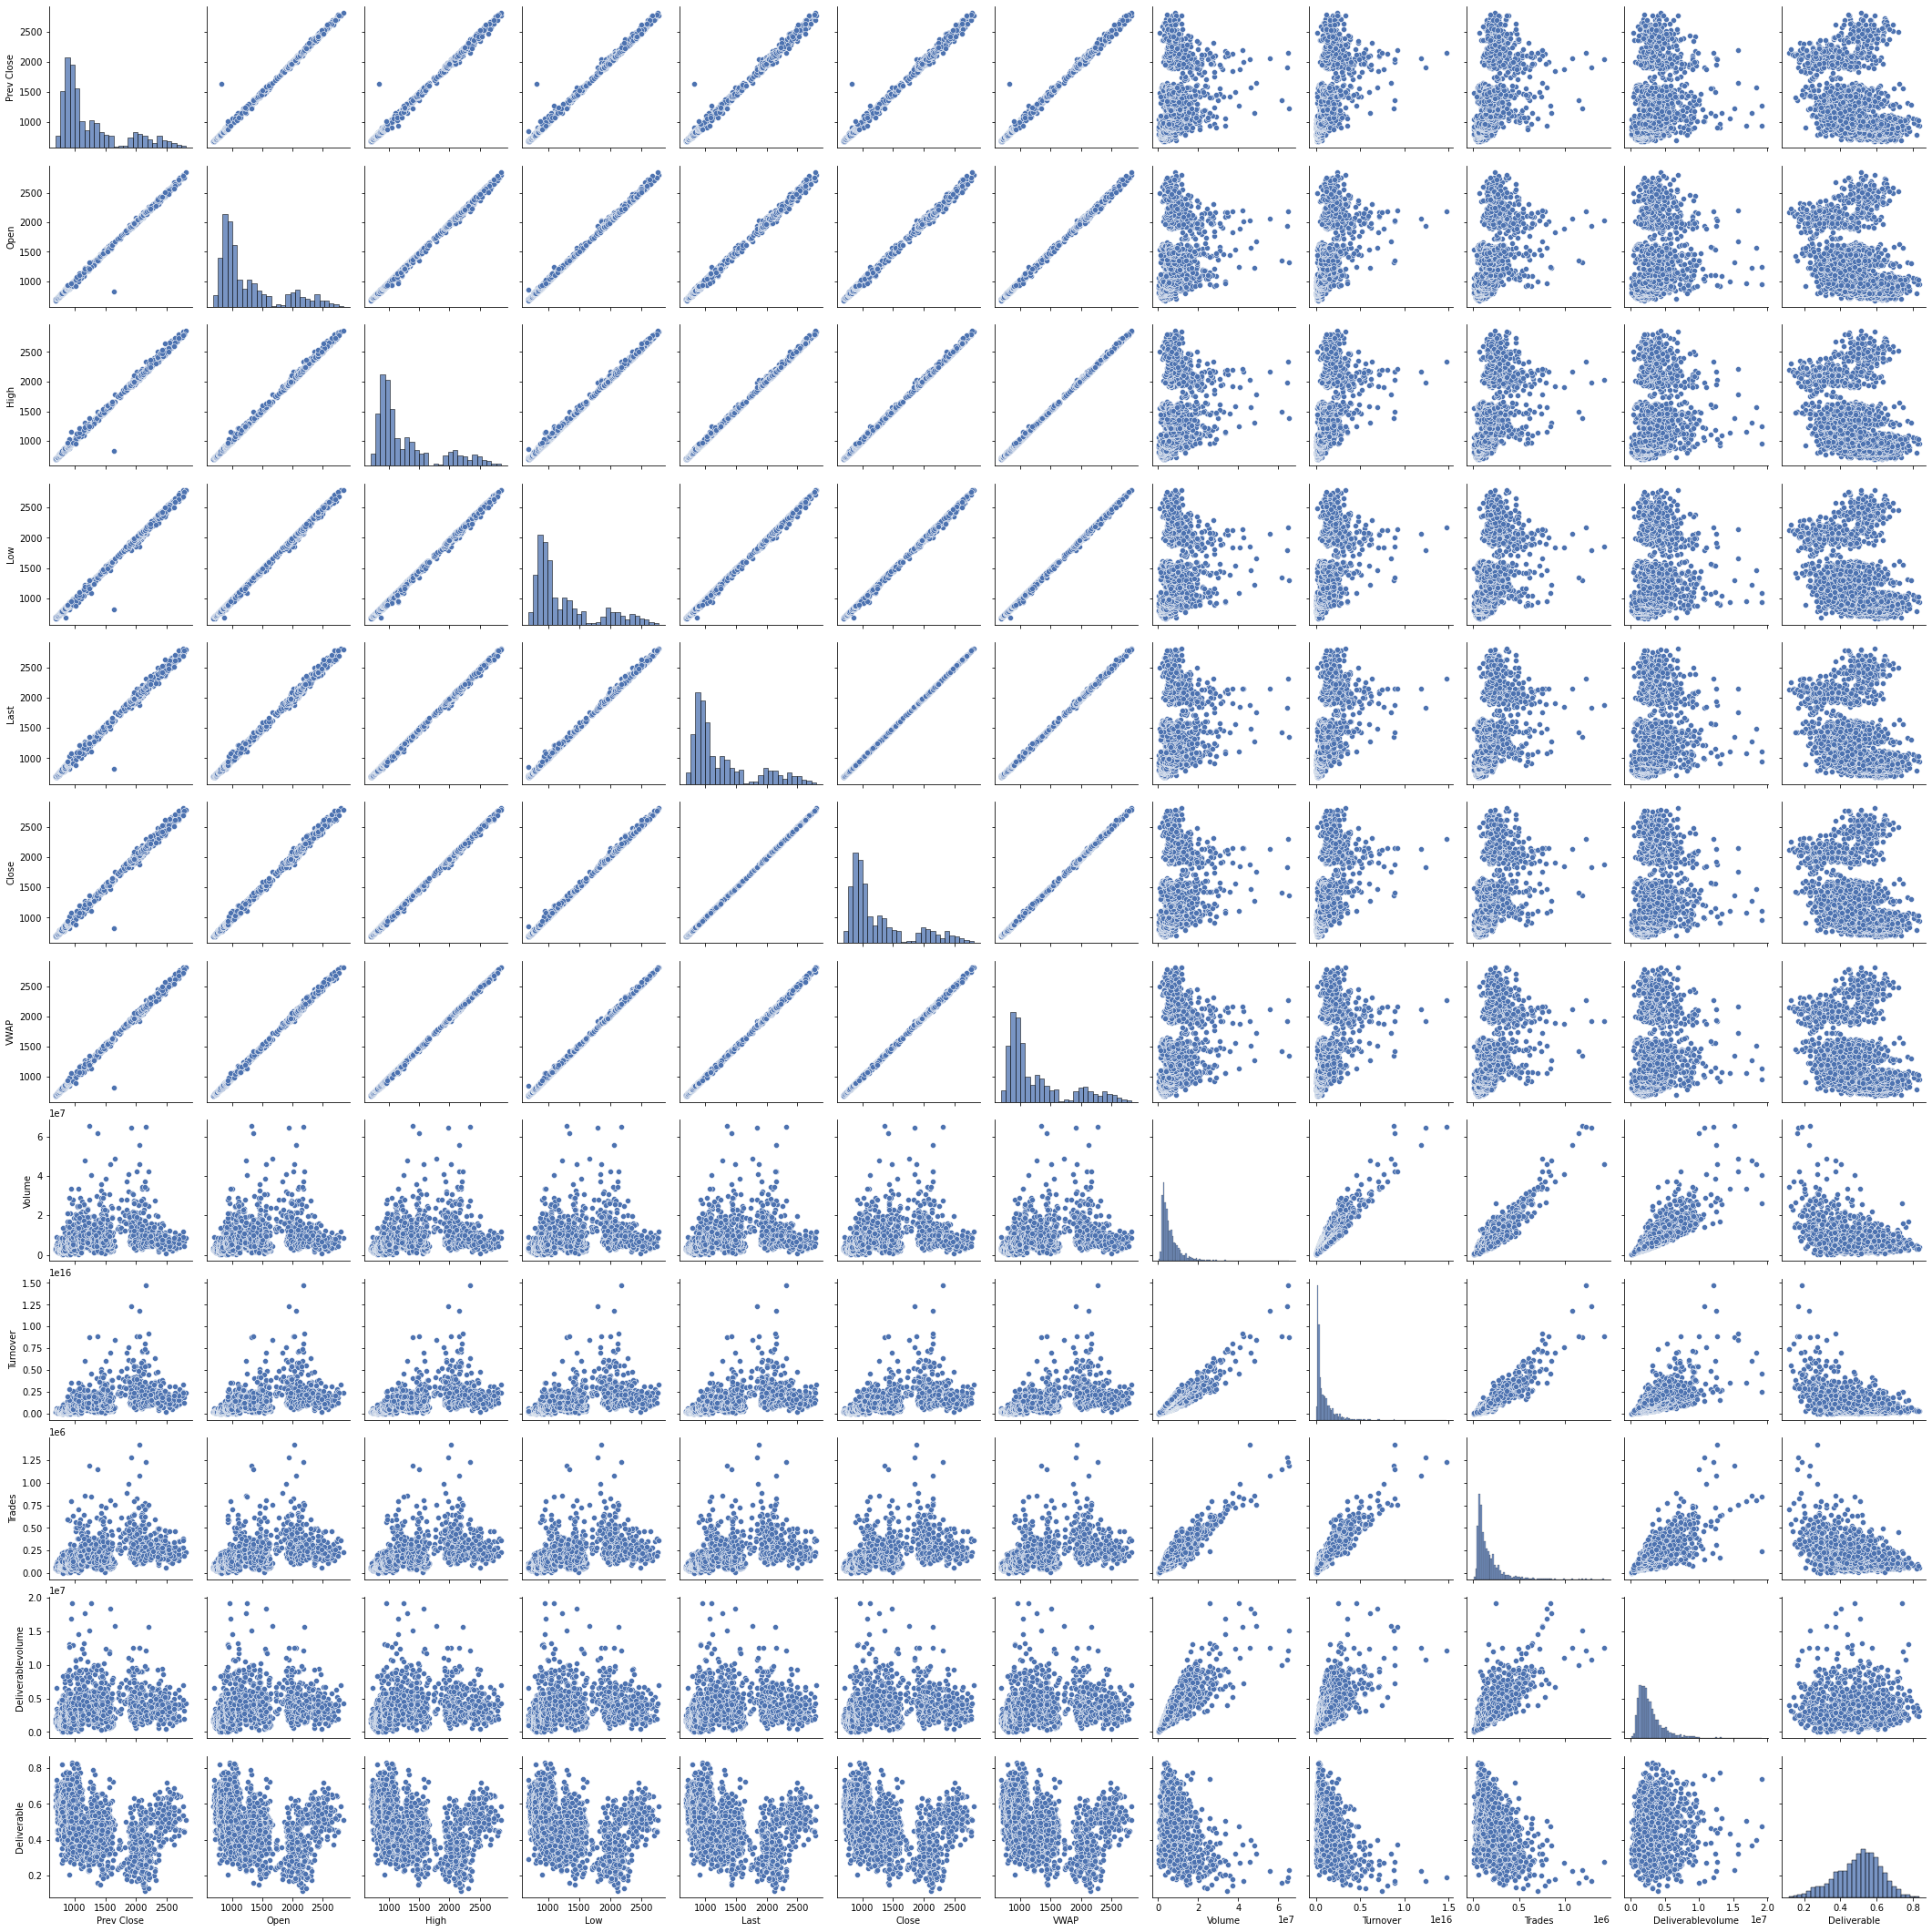

In [25]:
plt.rcParams["figure.figsize"]=(15,10)
sns.pairplot(df1)

<AxesSubplot:>

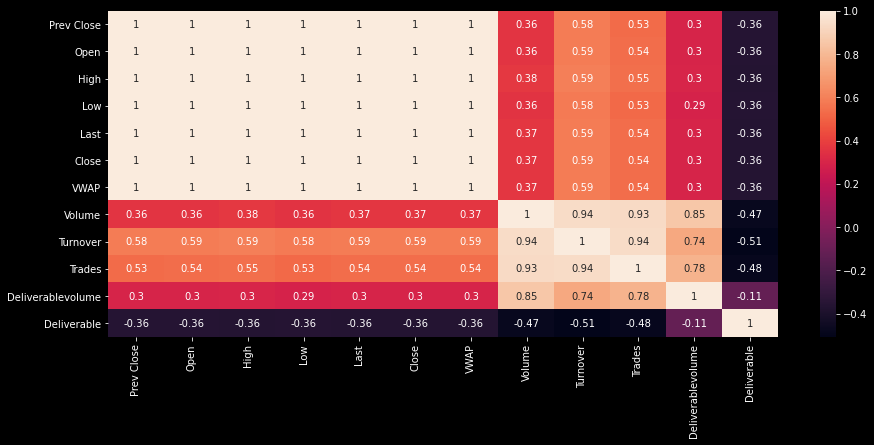

In [222]:
# Relaince Variables
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

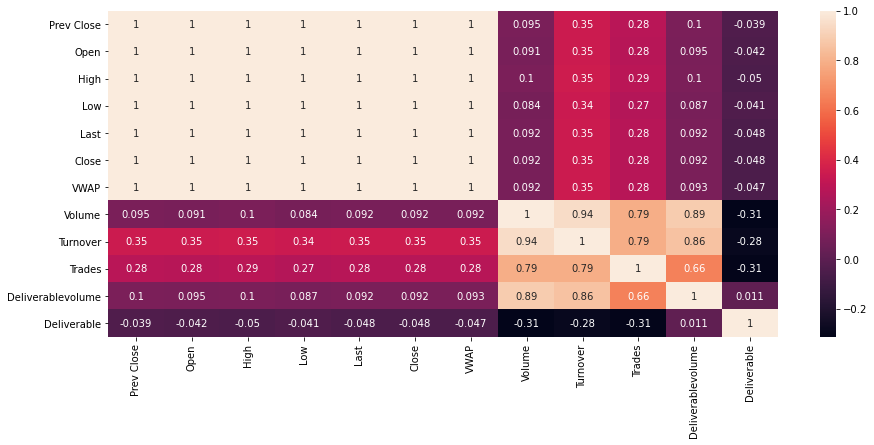

In [28]:
# TCS Variables
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(),annot=True)

# Opening price of the stock when the market opens

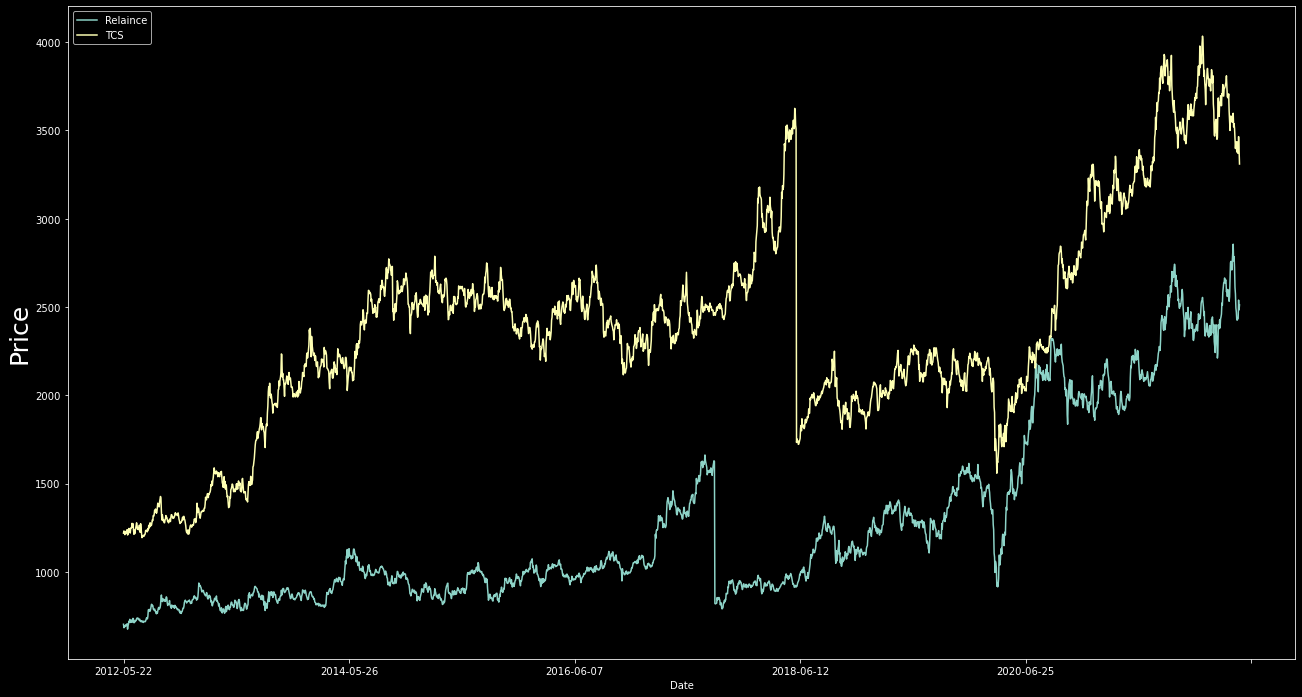

In [223]:
plt.style.use("dark_background")
plt.rcParams["figure.figsize"]=(22,12)
df_open.plot(x="Date")
plt.ylabel("Price",size=25)
plt.legend(loc="upper left")

In [224]:
df_close=pd.DataFrame()
df_close["Relaince"]=pd.Series(df1["Close"])
df_close["TCS"]=pd.Series(df2["Close"])
df_close["Date"]=pd.Series(df1["Date"])

In [225]:
plt.style.use("tableau-colorblind10")

# Closing price of the stock when the market closed

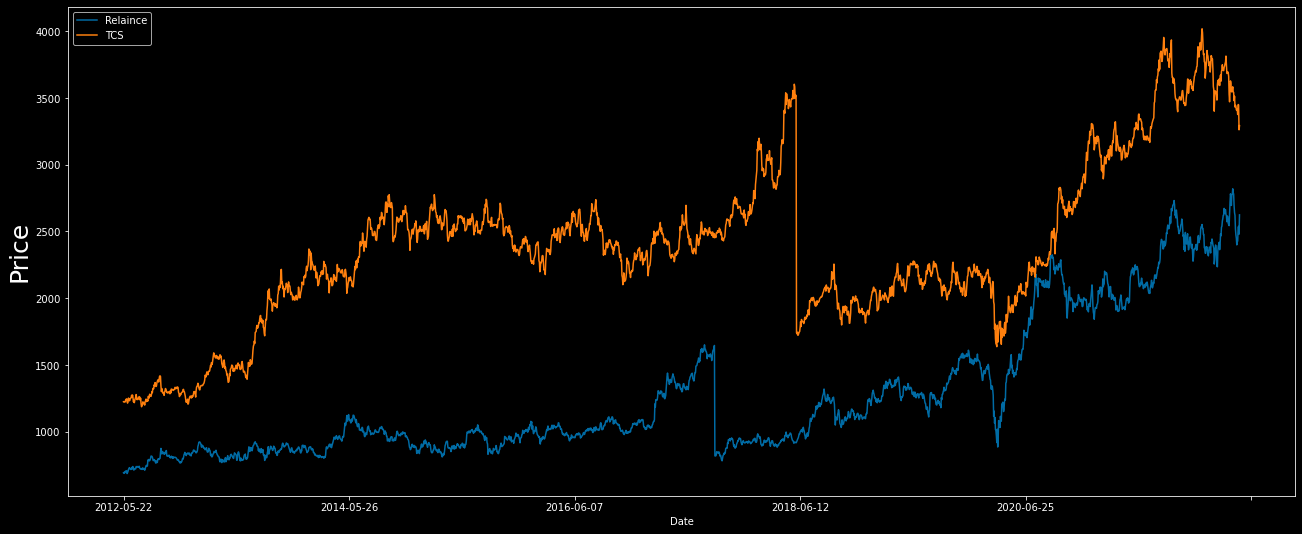

In [228]:
plt.rcParams["figure.figsize"]=(22,9)
df_close.plot(x="Date")
plt.ylabel("Price",size=25)
plt.legend(loc="upper left")

In [229]:
df_volume=pd.DataFrame()
df_volume["Relaince"]=pd.Series(df1["Volume"])
df_volume["TCS"]=pd.Series(df2["Volume"])
df_volume["Date"]=pd.Series(df1["Date"])

# Total amount of stock traded on that day

Text(0, 0.5, 'Count')

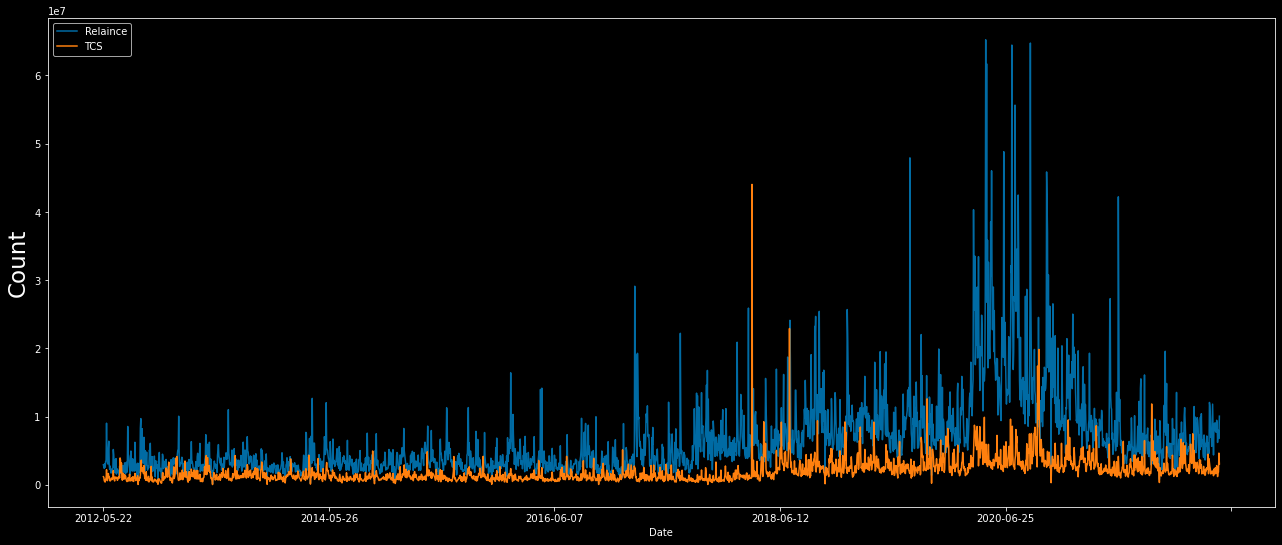

In [230]:
# Volume 
plt.style.use("tableau-colorblind10")
df_volume.plot(x="Date")
plt.legend(loc="upper left")
plt.ylabel("Count",size=23)

<ipython-input-250-d5e111b857d9>:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead.



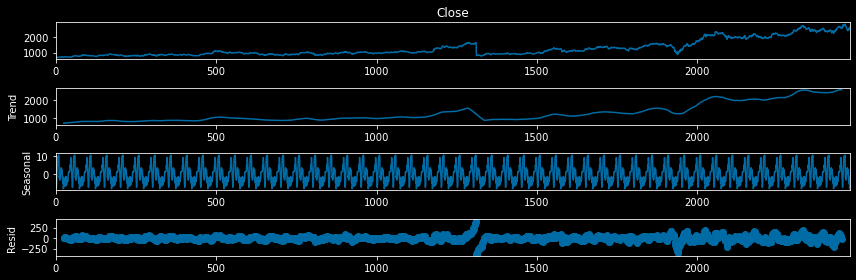

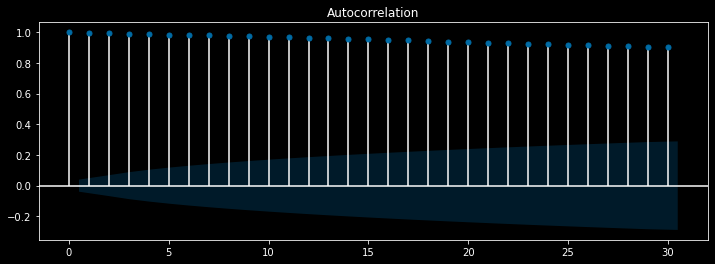

In [250]:
# To identify the Trend and Sesonality
df1_seasonal=seasonal_decompose(df1.Close,freq=50)

df1_seasonal.plot()
# ACF Plot - to identify the corrrlation 
plot_acf(df1["Close"],lags=30)

plt.show()
plt.rcParams["figure.figsize"]=(12,4)

<ipython-input-248-153de0da56b0>:2: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead.



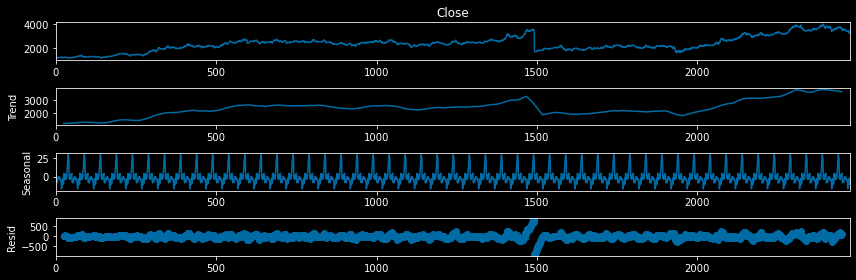

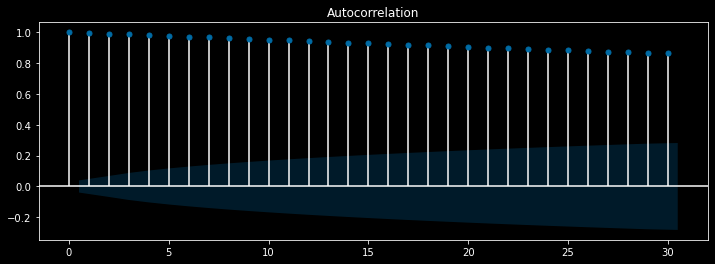

In [248]:
# To identify the Trend and Sesonality
df2_seasonal=seasonal_decompose(df2.Close,freq=50)
df2_seasonal.plot()
# ACF Plot - to identify the corrrlation 
plot_acf(df2["Close"],lags=30)

plt.show()
plt.rcParams["figure.figsize"]=(12,4)

# Moving average

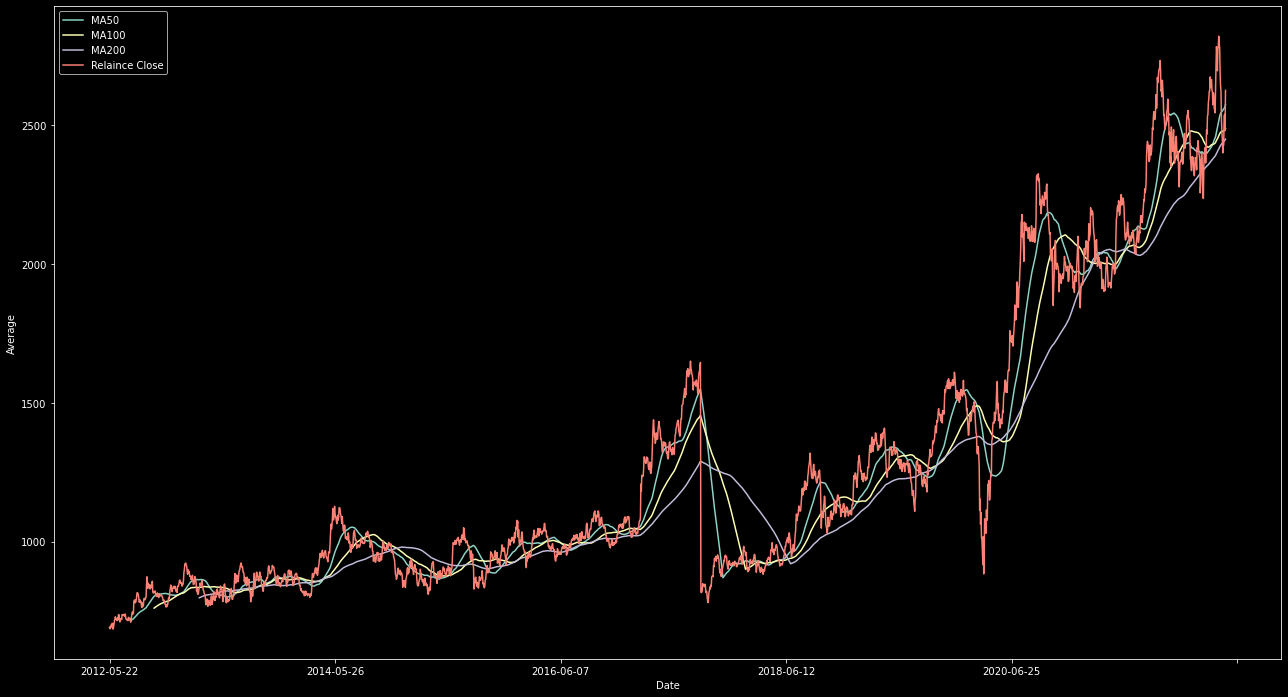

In [37]:
# Moving Average - Relaince
plt.style.use("dark_background")
R_MA=pd.DataFrame()
R_MA["50"]=df1["Close"].rolling(50).mean()
R_MA["100"]=df1["Close"].rolling(100).mean()
R_MA["200"]=df1["Close"].rolling(200).mean()
R_MA["Date"]=df1["Date"]
R_MA["Close"]=df1["Close"]
R_MA=R_MA.set_index("Date")
label=["MA50","MA100","MA200","Relaince Close"]
plt.rcParams["figure.figsize"]=(15,7)
R_MA.plot()
plt.ylabel("Average")
plt.legend(label,loc="upper left")

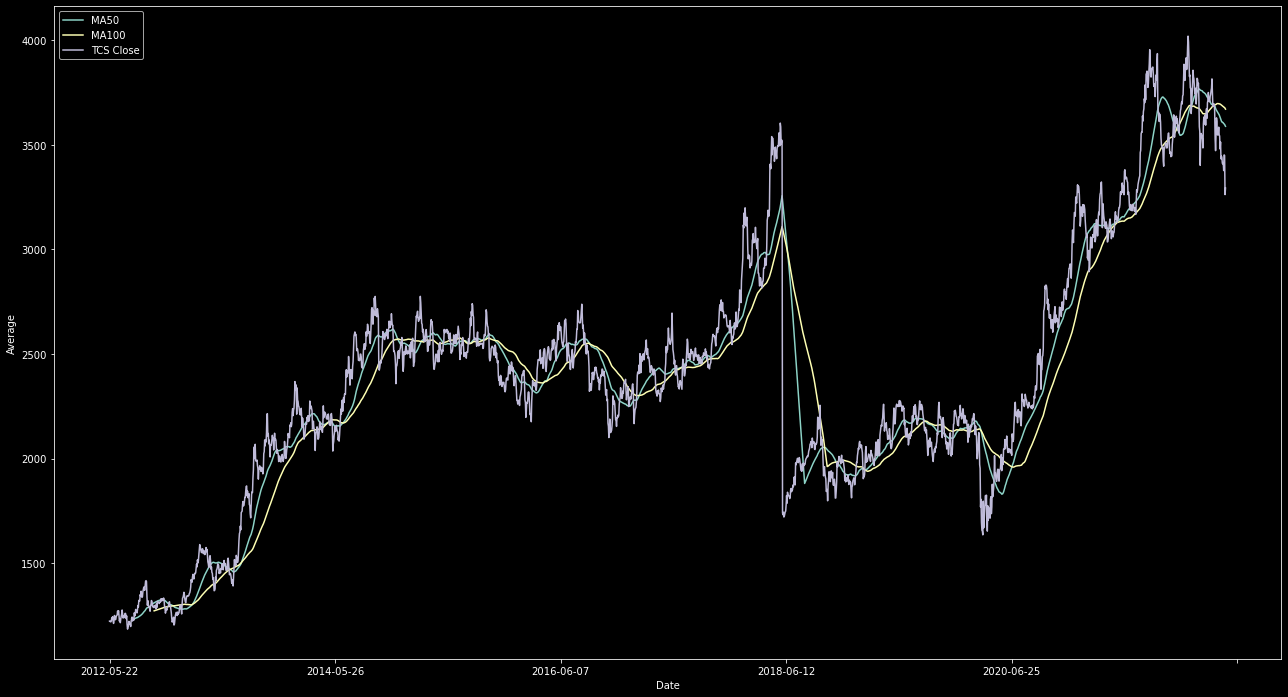

In [39]:
# Moving Average - TCS
T_MA=pd.DataFrame()
T_MA["50"]=df2["Close"].rolling(50).mean()
T_MA["100"]=df2["Close"].rolling(100).mean()
T_MA["Date"]=df2["Date"]
T_MA["Close"]=df2["Close"]
T_MA=T_MA.set_index("Date")
label=["MA50","MA100","TCS Close"]
T_MA.plot()
plt.ylabel("Average")
plt.legend(label,loc="upper left")

In [5]:
py.offline.init_notebook_mode(connected=True)
cff.go_offline()

In [6]:
# Reliance Year wise Average price
df1_Quarter=pd.read_csv("relaince_data.csv",parse_dates=True,index_col="Date")
df1_Quarter=df1_Quarter.Close.resample('Y').mean()

plt.rcParams["figure.figsize"]=(20,6)
df1_Quarter.iplot(kind="line",color="black")

In [6]:
# TCS Year wise Average price
df2_Quarter=pd.read_csv("tcs_data.csv",parse_dates=["Date"],index_col="Date")
df2_Quarter=df2_Quarter.Close.resample('Y').mean()
df2_Quarter.iplot(kind="line",color="black")

In [7]:
df_high=pd.DataFrame()
df_high["TCS"]=df2.High
# TCS high prices
# Reliance high prices
df_high["Reliance"]=df1.High
# Making Date as a Index 
df_high["Date"]=df1.Date
df_high=df_high.set_index("Date")
df_high.iplot(kind="bar")

In [8]:
df_low=pd.DataFrame()
df_low["TCS"]=df2.Low
# TCS low prices
# Reliance low prices
df_low["Reliance"]=df1.Low
# Making Date as a Index 
df_low["Date"]=df1.Date
df_low=df_low.set_index("Date")
df_low.iplot(kind="bar")

In [47]:
plt.style.use("dark_background")

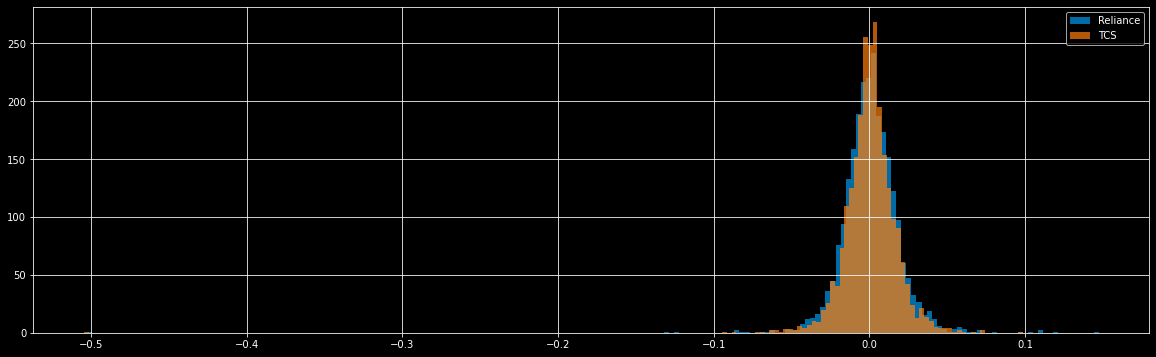

In [262]:
df_volatility=pd.DataFrame()
df_volatility["Reliance"]=(df1["Close"]/df1["Close"].shift(1))-1
df_volatility["TCS"]=(df2["Close"]/df2["Close"].shift(1))-1
df_volatility["Reliance"].hist(bins=200,alpha=1.0,label="Reliance")
df_volatility["TCS"].hist(bins=200,alpha=0.7,label="TCS")
plt.legend()

In [49]:
df1["High"].max(),df1["Low"].max()

(2856.15, 2786.1)

In [50]:
df2["High"].max(),df2["Low"].max()

(4043.0, 3980.0)

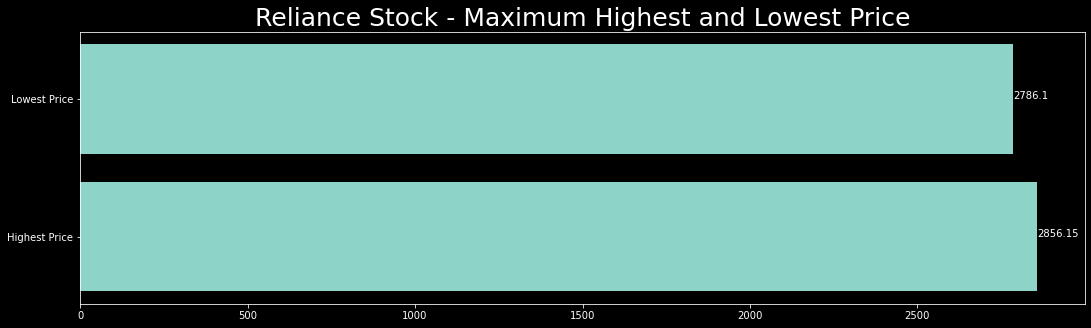

In [25]:
# 2012-05-22 - 2022-05-20
plt.style.use("dark_background")
plt.rcParams["figure.figsize"]=(18,5)
H_max_x1 = [2856.15,2786.10]
L_max_y1 = ["Highest Price","Lowest Price"]

plt.barh(L_max_y1,H_max_x1)
plt.title("Reliance Stock - Maximum Highest and Lowest Price",size=25)
 
for index, value in enumerate(H_max_x1):
    plt.text(value,index,
             str(value))

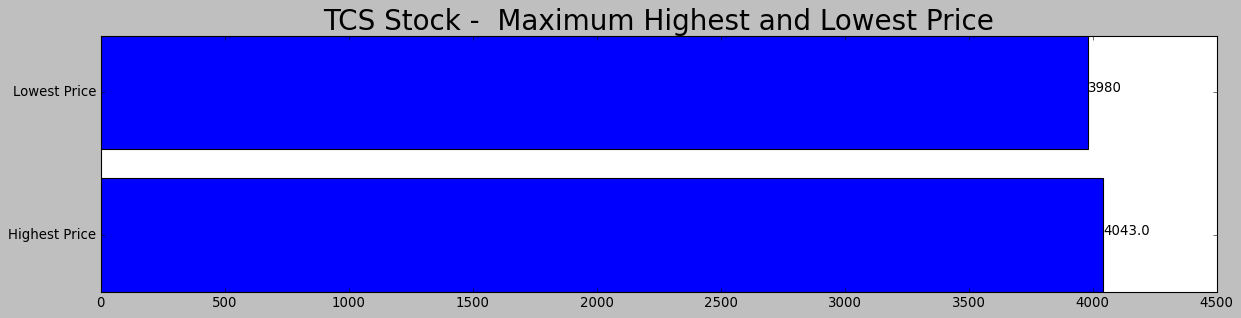

In [54]:
plt.style.use("classic")
plt.rcParams["figure.figsize"]=(18,4)
H_max_x2 = [4043.0,3980]
L_max_y2 = ["Highest Price","Lowest Price"]

plt.barh(L_max_y2,H_max_x2)
plt.title("TCS Stock -  Maximum Highest and Lowest Price",size=25)
 
for index, value in enumerate(H_max_x2):
    plt.text(value, index,
             str(value))

# High vs Low - Reliance

In [9]:
plt.style.use("dark_background")
h_l_r=pd.DataFrame()
h_l_r["r_high"]=pd.Series(df1.High)
h_l_r["r_low"]=pd.Series(df1.Low)
h_l_r["Date"]=df1.Date
h_l_r=h_l_r.set_index(["Date"])
h_l_r.iplot(kind="bar")

# High vs Low - TCS

In [10]:
plt.style.use("dark_background")
h_l_tcs=pd.DataFrame()
h_l_tcs["tcs_high"]=pd.Series(df2.High)
h_l_tcs["tcs_low"]=pd.Series(df2.Low)
h_l_tcs["Date"]=df2.Date
h_l_tcs=h_l_tcs.set_index(["Date"])
h_l_tcs.iplot(kind="bar",color=["green","lightgreen"])

# Preprocessing

# 1. Reliance

In [6]:
df_df1=df1.drop(["Symbol","Series","Prev Close","VWAP","Trades","Deliverablevolume","Deliverable"],axis=1)

In [7]:
df_df1

Date     Open     High      Low     Last    Close    Volume  \
0     2012-05-22   704.60   704.60   688.75   690.00   691.10   2938047   
1     2012-05-23   685.20   689.95   679.55   689.00   686.85   2583348   
2     2012-05-24   694.00   700.00   686.10   699.95   695.30   2399818   
3     2012-05-25   695.00   695.30   688.55   690.65   691.20   3085023   
4     2012-05-28   692.00   703.00   692.00   701.00   701.65   2575102   
...          ...      ...      ...      ...      ...      ...       ...   
2470  2022-05-16  2434.45  2481.00  2416.65  2428.05  2427.20   6201594   
2471  2022-05-17  2435.10  2539.90  2432.00  2533.50  2529.15   7638666   
2472  2022-05-18  2539.65  2570.00  2508.25  2542.25  2538.35   7973235   
2473  2022-05-19  2484.00  2512.50  2466.05  2477.90  2479.85   6783641   
2474  2022-05-20  2512.50  2644.40  2502.00  2628.85  2624.45  10057508   

          Turnover  
0     2.044993e+14  
1     1.772290e+14  
2     1.663208e+14  
3     2.133111e+14  
4     1.802680e+14  
...            ...  
2470  1.515841e+15  
2471  1.910453e+15  
2472  2.021911e+15  
2473  1.691936e+15  
2474  2.584080e+15  

[2475 rows x 8 columns]

In [8]:
df1_close_sqrt=sqrt(df_df1["Close"])
df1_close_log=log(df_df1["Close"])

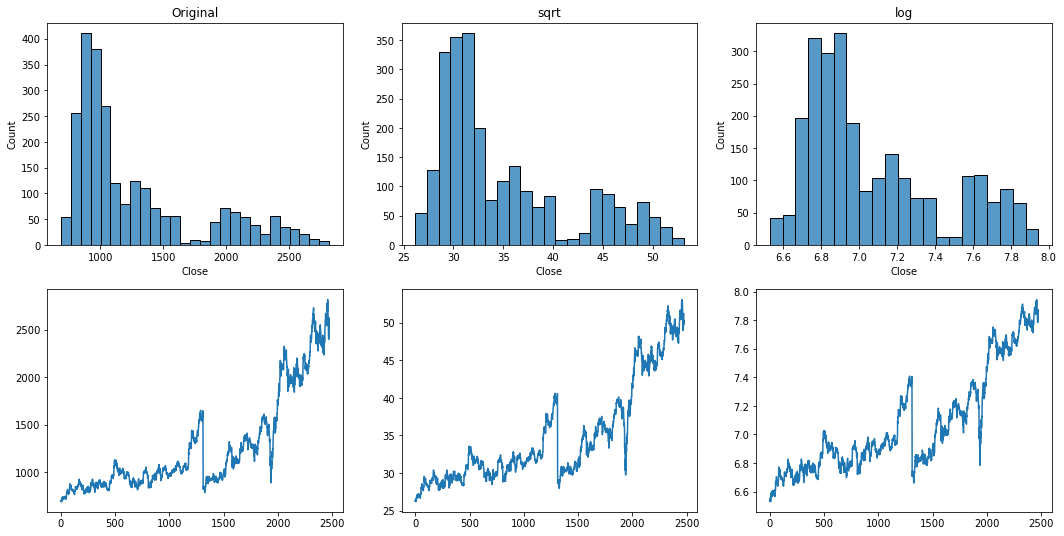

In [14]:
fig,ax=plt.subplots(2,3)
sns.histplot(df1["Close"],ax=ax[0,0]) ; ax[0,0].set_title("Original")
#ax[1]=plt.plot(df1["Close"])
ax[1,0].plot(df_df1.Close)
sns.histplot(df1_close_sqrt,ax=ax[0,1]) ; ax[0,1].set_title("sqrt")
ax[1,1].plot(df1_close_sqrt)
sns.histplot(df1_close_log,ax=ax[0,2]) ; ax[0,2].set_title("log")
ax[1,2].plot(df1_close_log)
plt.rcParams["figure.figsize"]=(18,9)

In [10]:
# dicky fuller test
adft=adfuller(df1_close_log)
output=pd.Series(adft[0:4],index=["t-value","p-value","no.of.lags","no.of.observations"])
output

t-value                 -1.163456
p-value                  0.689115
no.of.lags               0.000000
no.of.observations    2474.000000
dtype: float64

# 2. TCS

In [11]:
df_df2=df2.drop(["Symbol","Series","Prev Close","VWAP","Trades","Deliverablevolume","Deliverable"],axis=1)
df_df2

Date    Open     High      Low     Last    Close   Volume  \
0     2012-05-22  1221.0  1240.00  1213.00  1239.00  1224.05  1180458   
1     2012-05-23  1233.0  1235.55  1214.10  1220.90  1225.15  1081403   
2     2012-05-24  1225.0  1228.95  1207.10  1223.00  1221.45   602837   
3     2012-05-25  1212.1  1225.00  1209.10  1223.15  1220.80   457523   
4     2012-05-28  1224.0  1230.00  1215.05  1228.90  1224.70   395097   
...          ...     ...      ...      ...      ...      ...      ...   
2470  2022-05-16  3415.0  3430.00  3366.60  3385.00  3376.80  1195813   
2471  2022-05-17  3370.0  3467.00  3350.40  3466.75  3451.60  1754076   
2472  2022-05-18  3465.0  3495.00  3443.05  3455.00  3448.80  1866781   
2473  2022-05-19  3397.0  3405.00  3230.00  3271.90  3261.95  4642963   
2474  2022-05-20  3310.0  3313.90  3270.05  3299.00  3293.00  3065125   

          Turnover  
0     1.442907e+14  
1     1.323758e+14  
2     7.342466e+13  
3     5.575927e+13  
4     4.825108e+13  
...            ...  
2470  4.064579e+14  
2471  5.982349e+14  
2472  6.473332e+14  
2473  1.532318e+15  
2474  1.008750e+15  

[2475 rows x 8 columns]

In [12]:
df2_close_sqrt=sqrt(df_df2["Close"])
df2_close_log=log(df_df2["Close"])

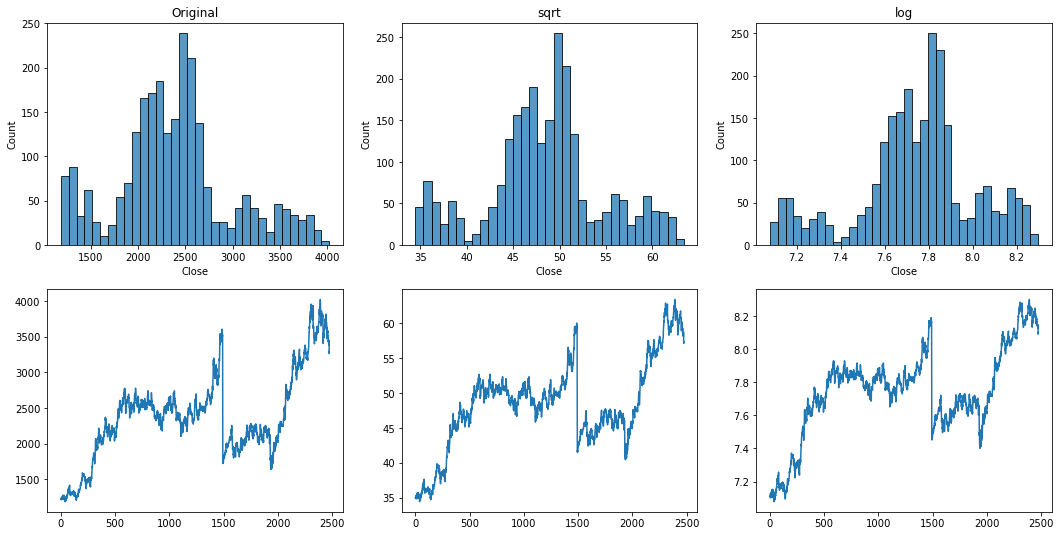

In [13]:
fig,ax=plt.subplots(2,3)
sns.histplot(df2["Close"],ax=ax[0,0]) ; ax[0,0].set_title("Original")
#ax[1]=plt.plot(df1["Close"])
ax[1,0].plot(df_df2.Close)
plt.rcParams["figure.figsize"]=(18,9)
sns.histplot(df2_close_sqrt,ax=ax[0,1]) ; ax[0,1].set_title("sqrt")
ax[1,1].plot(df2_close_sqrt)
sns.histplot(df2_close_log,ax=ax[0,2]) ; ax[0,2].set_title("log")
ax[1,2].plot(df2_close_log)

In [15]:
adft2=adfuller(df2_close_log)
output=pd.Series(adft2[0:4],index=["t-value","p-value","no.of.lags","no.of.observations"])
output

t-value                 -2.472725
p-value                  0.122252
no.of.lags               0.000000
no.of.observations    2474.000000
dtype: float64

# Model Building ( Reliance )

In [16]:
train1=df1_close_log.iloc[0:int(len(df1_close_log)*.80)]
test1=df1_close_log.iloc[int(len(df1_close_log)*.80):int(len(df1_close_log))]
train1.shape,test1.shape

((1980,), (495,))

In [17]:
# 1. Simple Exponential Smoothing
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

best_one=[]
for i in range(len(decimals)):
    model=SimpleExpSmoothing(train1).fit(smoothing_level=decimals[i])
    preds=model.predict(start=test1.index[0],end=test1.index[-1])
    best_one.append(mean_absolute_error(preds,test1))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.4235557330945098
0.2 : 0.41131282578849854
0.3 : 0.41364404914717123
0.4 : 0.41449182170709775
0.5 : 0.41415498945791457
0.6 : 0.41334511720832884
0.7 : 0.4123309143696083
0.8 : 0.4111697280078416
0.9 : 0.409864353701784
1.0 : 0.4084244642812633


/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model

In [18]:
# 1. Simple Exponential Smoothing
df1_model1=SimpleExpSmoothing(train1).fit(smoothing_level=1.0)
df1_preds1=df1_model1.predict(start=test1.index[0],end=test1.index[-1])
df1_error1=mean_absolute_error(df1_preds1,test1)
df1_error1

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



0.4084244642812633

In [19]:
# 2. Advance Exponential technique ( HOLT ) 
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=Holt(train1).fit(smoothing_level=1.0,smoothing_trend=decimals[i])
    preds=model.predict(start=test1.index[0],end=test1.index[-1])
    best_one.append(mean_absolute_error(preds,test1))
    
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model

0.1 : 0.13215122276190142
0.2 : 0.2293460508325629
0.3 : 0.23549602289161436
0.4 : 0.6377469489289966
0.5 : 1.0290921242504942
0.6 : 1.4269878708818104
0.7 : 1.8530830138020846
0.8 : 2.31526797608228
0.9 : 2.805556728056802
1.0 : 3.3078803104683887


In [20]:
# 2. Advance Exponential technique ( HOLT ) 
df1_model2=Holt(train1).fit(smoothing_level=1.0,smoothing_trend=0.1)
df1_preds2=df1_model2.predict(start=test1.index[0],end=test1.index[-1])
df1_error2=mean_absolute_error(df1_preds2,test1)
df1_error2

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



0.13215122276190142

In [21]:
# 3. Holt's winter additive trend and aditive sesonality
df1_model3=ExponentialSmoothing(train1,trend="add",seasonal="add",seasonal_periods=12).fit()
df1_preds3=df1_model3.predict(start=test1.index[0],end=test1.index[-1])
df1_error3=mean_absolute_error(df1_preds3,test1)
df1_error3

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



0.31433584665507125

In [22]:
# 4. Holt's winter additive trend and multiplicative sesonality
df1_model4=ExponentialSmoothing(train1,trend="add",seasonal="mul",seasonal_periods=12).fit()
df1_preds4=df1_model4.predict(start=test1.index[0],end=test1.index[-1])
df1_error4=mean_absolute_error(df1_preds4,test1)
df1_error4

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



0.3146434235021436

In [23]:
# 5. Auto Regressive
df1_model5 = AutoReg(train1, lags=10).fit()
print(df1_model5.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1980
Model:                    AutoReg(10)   Log Likelihood                4578.895
Method:               Conditional MLE   S.D. of innovations              0.024
Date:                Sun, 12 Jun 2022   AIC                             -7.474
Time:                        16:43:53   BIC                             -7.440
Sample:                            10   HQIC                            -7.462
                                 1980                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0532      0.019      2.751      0.006       0.015       0.091
Close.L1       0.9833      0.023     43.649      0.000       0.939       1.027
Close.L2       0.0186      0.032      0.590      0.5

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



In [24]:
len(train1)

1980

In [25]:
df1_preds5= df1_model5.predict(start=len(train1), end=2474, dynamic=False)
df1_error5=mean_absolute_error(df1_preds5,test1)
df1_error5

0.6328974501056189

In [26]:
test1.shape

(495,)

In [27]:
# 6. ARIMA Method
df1_model6 = ARIMA(train1, order=(3,1,0))
df1_model6 = df1_model6.fit()
a,b,c=df1_model6.forecast(495)
d=pd.Series(a,index=test1.index)
df1_error6=mean_absolute_error(d,test1)
df1_error6

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




0.3161008456712136

In [28]:
train1.shape,test1.shape

((1980,), (495,))

In [29]:
# 7. LSTM

#df1_lstm=pd.DataFrame()
#df1_lstm["1_day_back_price"]=df1_close_log.shift(1)
#df1_lstm["2_day_back_price"]=df1_close_log.shift(2)
#df1_lstm["3_day_back_price"]=df1_close_log.shift(3)
#df1_lstm["close"]=df1_close_log
#df1_lstm["Date"]=df_df1["Date"]
#df1_lstm=df1_lstm.set_index(["Date"])
#df1_lstm=df1_lstm.dropna()

#df1_lstm_x=df1_lstm.drop(["close"],axis=1)
#df1_lstm_y=df1_lstm["close"]

#df1_lstm_xtrain=df1_lstm_x[:1980]
#df1_lstm_xtest=df1_lstm_x[1980:]
#df1_lstm_ytrain=df1_lstm_y[:1980]
#df1_lstm_ytest=df1_lstm_y[1980:]

#n_features=1
#df1_lstm_xtrain=np.asarray(df1_lstm_xtrain)
#df1_lstm_xtrain=df1_lstm_xtrain.reshape(df1_lstm_xtrain.shape[0],df1_lstm_xtrain.shape[1],n_features)
#df1_lstm_xtest=np.asarray(df1_lstm_xtest)
#df1_lstm_xtest=df1_lstm_xtest.reshape(df1_lstm_xtest.shape[0],df1_lstm_xtest.shape[1],n_features)

#df1_lstm_ytrain=np.asarray(df1_lstm_ytrain)
#df1_lstm_ytest=np.asarray(df1_lstm_ytest)


normalizing1=MinMaxScaler(feature_range=(0,1))
df1_lstm=normalizing1.fit_transform(np.array(df1_close_log).reshape(-1,1))

train_data1=int(len(df1_lstm)*0.80)
test_data1=len(df1_lstm)-train_data1
train_data1,test_data1

(1980, 495)

In [30]:
df1_train,df1_test=df1_lstm[0:train_data1,:],df1_lstm[train_data1:len(df1_lstm),:]

In [31]:
df1_train.shape,df1_test.shape

((1980, 1), (495, 1))

In [32]:
def create_df1(dataset,step):
    xxtrain,yytrain=[],[]
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        xxtrain.append(a)
        yytrain.append(dataset[i+step,0])
    return np.array(xxtrain),np.array(yytrain)

In [33]:
t_s1=100
df1_lstm_xtrain,df1_lstm_ytrain=(create_df1(df1_train,t_s1))
df1_lstm_xtest,df1_lstm_ytest=(create_df1(df1_test,t_s1))

In [34]:
df1_lstm_xtrain.shape,df1_lstm_ytrain.shape,df1_lstm_xtest.shape,df1_lstm_ytest.shape

((1879, 100), (1879,), (394, 100), (394,))

In [35]:
n_features=1
df1_lstm_xtrain=df1_lstm_xtrain.reshape(df1_lstm_xtrain.shape[0],df1_lstm_xtrain.shape[1],n_features)
df1_lstm_xtest=df1_lstm_xtest.reshape(df1_lstm_xtest.shape[0],df1_lstm_xtest.shape[1],n_features)

In [36]:
df1_lstm_xtrain.shape,df1_lstm_xtest.shape

((1879, 100, 1), (394, 100, 1))

In [37]:
df1_model7 = Sequential()
df1_model7.add(LSTM(50,return_sequences=True,input_shape=(df1_lstm_xtrain.shape[1],1)))
df1_model7.add(LSTM(50,return_sequences=True))
df1_model7.add(LSTM(50))
df1_model7.add(Dense(1,activation='linear')) 
df1_model7.compile(optimizer="adam",loss="MAE")
df1_model7.fit(df1_lstm_xtrain,df1_lstm_ytrain,validation_data=(df1_lstm_xtest,df1_lstm_ytest),epochs=10,batch_size=64)

Epoch 1/10
30/30 [==============================] - 19s 370ms/step - loss: 0.0853 - val_loss: 0.0557
Epoch 2/10
30/30 [==============================] - 13s 432ms/step - loss: 0.0303 - val_loss: 0.0260
Epoch 3/10
30/30 [==============================] - 14s 473ms/step - loss: 0.0274 - val_loss: 0.0507
Epoch 4/10
30/30 [==============================] - 10s 327ms/step - loss: 0.0272 - val_loss: 0.0726
Epoch 5/10
30/30 [==============================] - 8s 277ms/step - loss: 0.0229 - val_loss: 0.0904
Epoch 6/10
30/30 [==============================] - 11s 358ms/step - loss: 0.0212 - val_loss: 0.0276
Epoch 7/10
30/30 [==============================] - 10s 343ms/step - loss: 0.0199 - val_loss: 0.0192
Epoch 8/10
30/30 [==============================] - 11s 356ms/step - loss: 0.0199 - val_loss: 0.0231
Epoch 9/10
30/30 [==============================] - 9s 298ms/step - loss: 0.0225 - val_loss: 0.0205
Epoch 10/10
30/30 [==============================] - 8s 277ms/step - loss: 0.0214 - val_loss:

In [38]:
df1_lstm_ytest.shape

(394,)

In [39]:
fut_inp1=df1_lstm_ytest[294:]
fut_inp1=fut_inp1.reshape(1,-1)
temp_inp1=list(fut_inp1)
fut_inp1.shape

(1, 100)

In [40]:
temp_inp1=temp_inp1[0].tolist()

In [41]:
lst_out1=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp1)>100):
        fut_inp1=np.array(temp_inp1[1:])
        fut_inp1=fut_inp1.reshape(1,-1)
        fut_inp1=fut_inp1.reshape((1,n_steps,1))
        yhat=df1_model7.predict(fut_inp1,verbose=0)
        temp_inp1.extend(yhat[0].tolist())
        temp_inp1=temp_inp1[1:]
        lst_out1.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp1=fut_inp1.reshape((1,n_steps,1))
        yhat=df1_model7.predict(fut_inp1,verbose=0)
        temp_inp1.extend(yhat[0].tolist())
        lst_out1.extend(yhat.tolist())
        i=i+1
               
    print(lst_out1) 

[[0.8775167465209961]]
[[0.8775167465209961], [0.8815242648124695]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979], [0.8847969174385071]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979], [0.8847969174385071], [0.884806752204895]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979], [0.8847969174385071], [0.884806752204895], [0.8843637704849243]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979], [0.8847969174385071], [0.884806752204895], [0.8843637704849243], [0.8837849497795105]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979], [0.8847969174385071], [0.884806752204895], [0.8843637704849243], [0.8837849497795105], [0.8832427263259888]]
[[0.8775167465209961], [0.8815242648124695], [0.88387131690979], [0.8847969174385071], [0.884806752204895], [0.8843637704849243], [0.8837849497795105], [0.8832427263259888], [0.8828030824661255]]
[[0.8775167465209961

In [42]:
# 30 days forcast - reliance
np.exp(normalizing1.inverse_transform(lst_out1))

array([[2371.23784486],
       [2384.71917945],
       [2392.65024926],
       [2395.78525102],
       [2395.81858334],
       [2394.31767465],
       [2392.35793379],
       [2390.52355715],
       [2389.03724644],
       [2387.90157558],
       [2387.02023709],
       [2386.25833685],
       [2385.48561685],
       [2384.59290482],
       [2383.49391431],
       [2382.1274666 ],
       [2380.45126863],
       [2378.44150822],
       [2376.08641018],
       [2373.38660372],
       [2370.3550617 ],
       [2367.01022791],
       [2363.3789478 ],
       [2359.49379009],
       [2355.39137748],
       [2351.11172186],
       [2346.69400505],
       [2342.18189057],
       [2337.6169533 ],
       [2333.03809329]])

In [43]:
df1_preds7=df1_model7.predict(df1_lstm_xtest)

In [44]:
df1_error7=mean_absolute_error(df1_preds7,df1_lstm_ytest)
df1_error7

0.017897075152766583

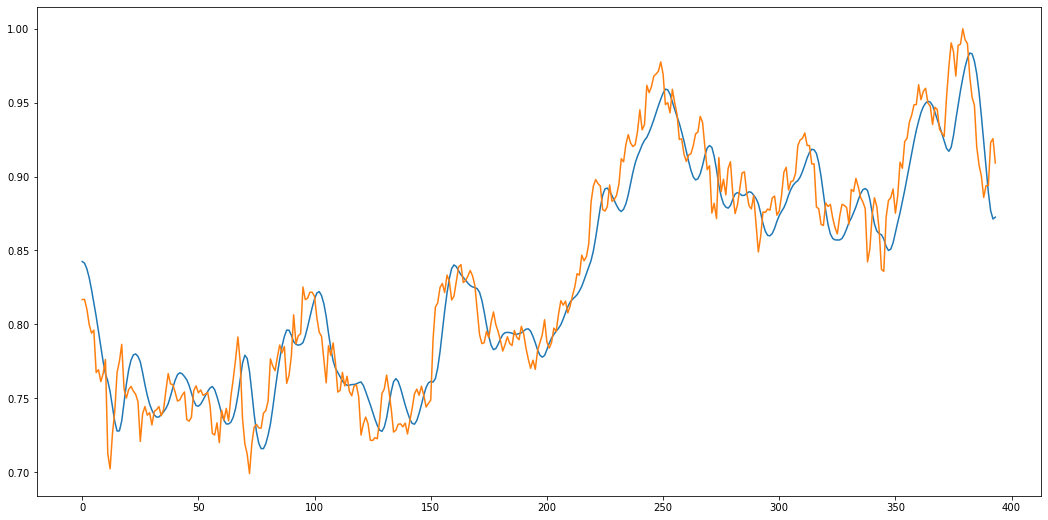

In [45]:
plt.plot(df1_preds7)
plt.plot(df1_lstm_ytest)

In [46]:
plot_new1=np.arange(1,101)
plot_pred1=np.arange(101,131)

In [47]:
df1_lstm.shape

(2475, 1)

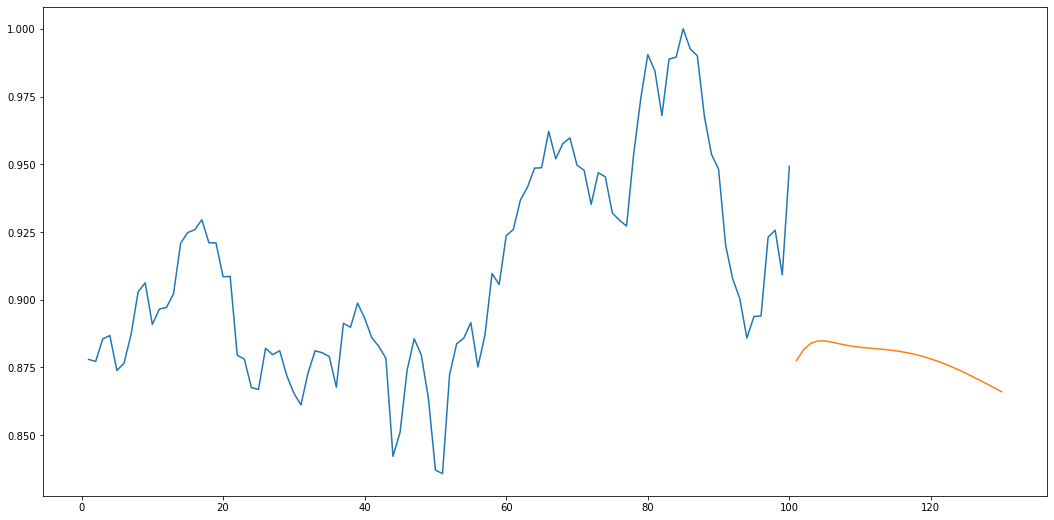

In [48]:
plt.plot(plot_new1,df1_lstm[2375:])
plt.plot(plot_pred1,lst_out1)

In [49]:
2475-394

2081

In [50]:
df1_lstm_xtrain.shape,df1_lstm_ytest.shape,df1_lstm.shape

((1879, 100, 1), (394,), (2475, 1))

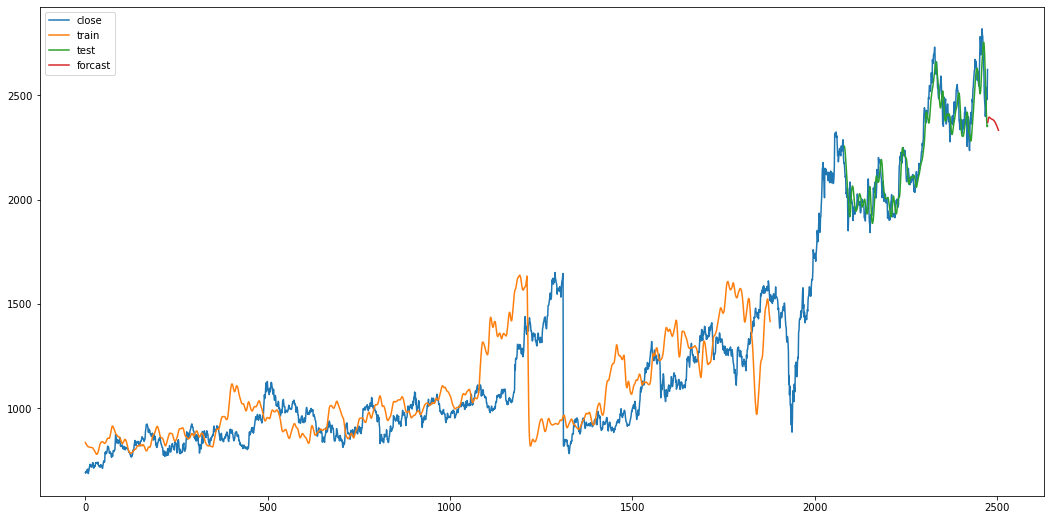

In [51]:
ranges1=np.arange(2081,2475)
ranges2=np.arange(2475,2505)
c1=np.exp(normalizing1.inverse_transform(df1_lstm))
c2=np.exp(normalizing1.inverse_transform(df1_model7.predict(df1_lstm_xtrain)))
c3=np.exp(normalizing1.inverse_transform(df1_preds7))
c4=np.exp(normalizing1.inverse_transform(lst_out1))
plt.plot(c1)
plt.plot(c2)
plt.plot(ranges1,c3)
plt.plot(ranges2,c4)
label=["close","train","test","forcast"]
plt.legend(label)

In [52]:
df1_models=dict()
df1_models["SES"]=1-df1_error1
df1_models["AES (HOLT'S)"]=1-df1_error2
df1_models["AES add(trend,sesonal)"]=1-df1_error3
df1_models["AES add(trend),mul(sesonal)"]=1-df1_error4
df1_models["AutoRegressive"]=1-df1_error5
df1_models["ARIMA"]=1-df1_error6
df1_models["LSTM"]=1-df1_error7

In [53]:
df1_models=pd.DataFrame(list(df1_models.items()),columns=["Model","Accuracy"])

In [54]:
df1_models=df1_models.sort_values(["Accuracy"],ascending=False)
df1_models

Model  Accuracy
6                         LSTM  0.982103
1                 AES (HOLT'S)  0.867849
2       AES add(trend,sesonal)  0.685664
3  AES add(trend),mul(sesonal)  0.685357
5                        ARIMA  0.683899
0                          SES  0.591576
4               AutoRegressive  0.367103

<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

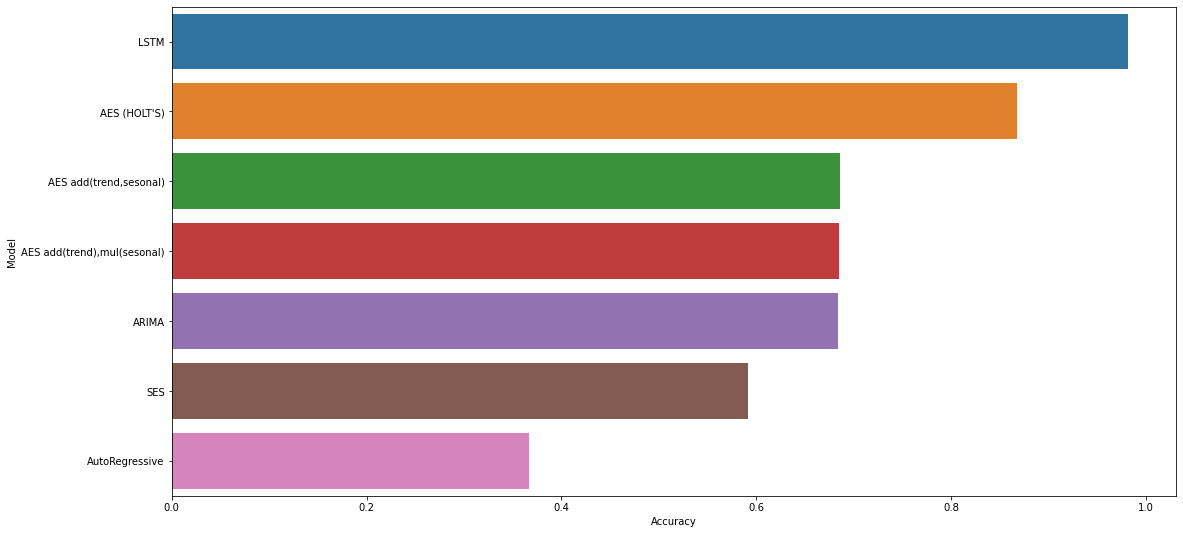

In [55]:
sns.barplot(x="Accuracy",y="Model",data=df1_models)

# Finalize Model for reliance is ( LSTM ) - supply entire data init

In [68]:
df1_x,df1_y=create_df1(df1_lstm,t_s1)
df1_x.shape,df1_y.shape

((2374, 100), (2374,))

In [69]:
df1_x=df1_x.reshape(df1_x.shape[0],df1_x.shape[1],n_features)

In [70]:
df1_model = Sequential()
df1_model.add(LSTM(50,return_sequences=True,input_shape=(df1_x.shape[1],1)))
df1_model.add(LSTM(50,return_sequences=True))
df1_model.add(LSTM(50))
df1_model.add(Dense(1,activation='linear')) 
df1_model.compile(optimizer="adam",loss="MAE")
df1_model.fit(df1_x,df1_y,epochs=10,batch_size=64)

Epoch 1/10
38/38 [==============================] - 19s 271ms/step - loss: 0.0866
Epoch 2/10
38/38 [==============================] - 12s 322ms/step - loss: 0.0316
Epoch 3/10
38/38 [==============================] - 13s 352ms/step - loss: 0.0299
Epoch 4/10
38/38 [==============================] - 19s 501ms/step - loss: 0.0304
Epoch 5/10
38/38 [==============================] - 25s 613ms/step - loss: 0.0288
Epoch 6/10
38/38 [==============================] - 20s 533ms/step - loss: 0.0260
Epoch 7/10
38/38 [==============================] - 19s 490ms/step - loss: 0.0244
Epoch 8/10
38/38 [==============================] - 17s 453ms/step - loss: 0.0244
Epoch 9/10
38/38 [==============================] - 21s 560ms/step - loss: 0.0231
Epoch 10/10
38/38 [==============================] - 19s 496ms/step - loss: 0.0234


In [71]:
df1_y.shape

(2374,)

In [72]:
fut_inp=df1_y[2274:]
fut_inp=fut_inp.reshape(1,-1)
temp_inp=list(fut_inp)
fut_inp.shape

(1, 100)

In [73]:
temp_inp=temp_inp[0].tolist()

In [74]:
lst_out=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp)>100):
        fut_inp=np.array(temp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=df1_model.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        temp_inp=temp_inp[1:]
        lst_out.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp=fut_inp.reshape((1,n_steps,1))
        yhat=df1_model.predict(fut_inp,verbose=0)
        temp_inp.extend(yhat[0].tolist())
        lst_out.extend(yhat.tolist())
        i=i+1
               
    print(lst_out) 

[[0.8867133259773254]]
[[0.8867133259773254], [0.8876320123672485]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234], [0.8905435800552368]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234], [0.8905435800552368], [0.8918625712394714]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234], [0.8905435800552368], [0.8918625712394714], [0.8930476307868958]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234], [0.8905435800552368], [0.8918625712394714], [0.8930476307868958], [0.8941745162010193]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234], [0.8905435800552368], [0.8918625712394714], [0.8930476307868958], [0.8941745162010193], [0.8953213691711426]]
[[0.8867133259773254], [0.8876320123672485], [0.8890783190727234], [0.8905435800552368], [0.8918625712394714], [0.8930476307868958], [0.8941745162010193], [0.8953213691711426], [0.8965409398078918]]
[

In [75]:
np.exp(normalizing1.inverse_transform(lst_out))

array([[2402.28917456],
       [2405.4132781 ],
       [2410.33985288],
       [2415.34128141],
       [2419.85231697],
       [2423.91248244],
       [2427.77965469],
       [2431.7216851 ],
       [2435.92068757],
       [2440.45102094],
       [2445.29471185],
       [2450.37156394],
       [2455.56931357],
       [2460.76335676],
       [2465.83843329],
       [2470.68897088],
       [2475.2305357 ],
       [2479.39720694],
       [2483.13974458],
       [2486.42496918],
       [2489.23761855],
       [2491.56956719],
       [2493.42765833],
       [2494.82513365],
       [2495.78331395],
       [2496.33200308],
       [2496.50166441],
       [2496.33052965],
       [2495.85633926],
       [2495.12092256]])

In [76]:
df1_entire_data=df1_lstm.tolist()
df1_entire_data.extend(lst_out)

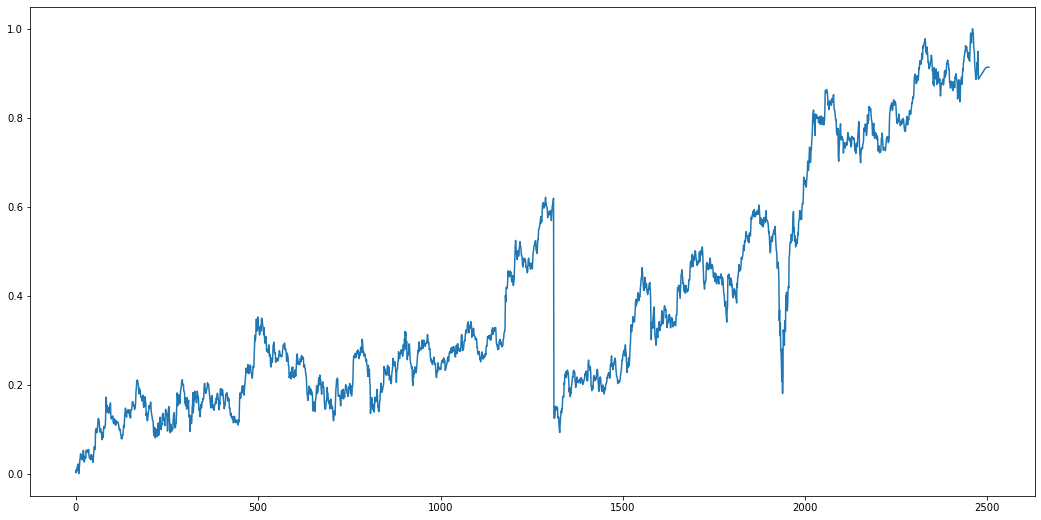

In [77]:
plt.plot(df1_entire_data)

# Generating file for Deployment - Reliance

In [80]:
df1_model.save("relaince_model.h5")

#  TCS - models

In [81]:
train2=df2_close_log.iloc[0:int(len(df2_close_log)*.80)]
test2=df2_close_log.iloc[int(len(df2_close_log)*.80):int(len(df2_close_log))]

In [82]:
train2.shape,test2.shape

((1980,), (495,))

In [83]:
# 1.Simple Exponential Smoothing
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=SimpleExpSmoothing(train2).fit(smoothing_level=decimals[i])
    preds=model.predict(start=test2.index[0],end=test2.index[-1])
    best_one.append(mean_absolute_error(preds,test2))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.4662204692607713
0.2 : 0.4496522674521869
0.3 : 0.443603872304639
0.4 : 0.44037537578220626
0.5 : 0.43840616351645945
0.6 : 0.43698851442252784
0.7 : 0.4356433967386835
0.8 : 0.4340344185439109
0.9 : 0.4319265097764256
1.0 : 0.4291576222850159


In [84]:
# 2. Simple Exponential Smoothing
df2_model1=SimpleExpSmoothing(train2).fit(smoothing_level=1.0)
df2_preds1=df2_model1.predict(start=test2.index[0],end=test2.index[-1])
df2_error1=mean_absolute_error(df2_preds1,test2)
df2_error1

0.4291576222850159

In [85]:
# 2. Advance Exponential Smoothing ( HOLT )
decimals=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
best_one=[]
for i in range(len(decimals)):
    model=Holt(train2).fit(smoothing_level=1.0,smoothing_trend=decimals[i])
    preds=model.predict(start=test2.index[0],end=test2.index[-1])
    best_one.append(mean_absolute_error(preds,test2))
for j in range(len(decimals)):
    print(decimals[j],":",best_one[j])

0.1 : 0.5942913852649288
0.2 : 0.8459179204980724
0.3 : 1.1128091045194222
0.4 : 1.4334384817515236
0.5 : 1.8743562182735414
0.6 : 2.4965737836783193
0.7 : 3.3404093377672033
0.8 : 4.430326465912986
0.9 : 5.7806563892229
1.0 : 7.39791660046919


In [86]:
# 2. Advance Exponential Smoothing ( HOLT )
df2_model2=Holt(train2).fit(smoothing_level=1.0,smoothing_trend=0.1)
df2_preds2=df2_model2.predict(start=test2.index[0],end=test2.index[-1])
df2_error2=mean_absolute_error(df2_preds2,test2)
df2_error2

0.5942913852649288

In [87]:
# 3. Holt's winter additive trend and aditive sesonality
df2_model3=ExponentialSmoothing(train2,trend="add",seasonal="add",seasonal_periods=12).fit()
df2_preds3=df2_model3.predict(start=test2.index[0],end=test2.index[-1])
df2_error3=mean_absolute_error(df2_preds3,test2)
df2_error3

0.3670912284094123

In [88]:
# 4. Holt's winter additive trend and multiplicative sesonality
df2_model4=ExponentialSmoothing(train2,trend="add",seasonal="mul",seasonal_periods=12).fit()
df2_preds4=df2_model4.predict(start=test2.index[0],end=test2.index[-1])
df2_error4=mean_absolute_error(df2_preds4,test2)
df2_error4

0.366813495013722

In [89]:
# 6. Auto Regressive
df2_model5 = AutoReg(train2, lags=10).fit()
print(df2_model5.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1980
Model:                    AutoReg(10)   Log Likelihood                4707.117
Method:               Conditional MLE   S.D. of innovations              0.022
Date:                Sun, 12 Jun 2022   AIC                             -7.604
Time:                        17:25:19   BIC                             -7.570
Sample:                            10   HQIC                            -7.592
                                 1980                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0483      0.017      2.829      0.005       0.015       0.082
Close.L1       0.9927      0.023     44.065      0.000       0.949       1.037
Close.L2      -0.0024      0.032     -0.074      0.9

In [90]:
df2_preds5 = df2_model5.predict(start=len(train2), end=2474, dynamic=False)
df2_error5=mean_absolute_error(df2_preds5,test2)
df2_error5

0.3542149711271785

In [91]:
test2.shape

(495,)

In [92]:
# 6. ARIMA Method
df2_model6 = ARIMA(train2, order=(3,1,0))
df2_model6 = df2_model6.fit()
a,b,c=df2_model6.forecast(495)
d=pd.Series(a,index=test2.index)
df2_error6=mean_absolute_error(d,test2)
df2_error6

0.36721559564131395

In [93]:
# 8. LSTM

#df2_lstm=pd.DataFrame()
#df2_lstm["1_day_back_price"]=df2_close_log.shift(1)
#df2_lstm["2_day_back_price"]=df2_close_log.shift(2)
#df2_lstm["3_day_back_price"]=df2_close_log.shift(3)
#df2_lstm["close"]=df2_close_log
#df2_lstm["Date"]=df_df2["Date"]
#df2_lstm=df2_lstm.set_index(["Date"])
#df2_lstm=df2_lstm.dropna()
#df2_lstm_x=df2_lstm.drop(["close"],axis=1)
#df2_lstm_y=df2_lstm[["close"]]
#df2_lstm_close=np.array(df2_close_log).reshape(-1,1)

#df2_lstm_x=np.array(df2_lstm_x).reshape(-1,1)
#df2_lstm_y=np.array(df2_lstm_y).reshape(-1,1)

#df2_lstm_xtrain=df2_lstm_x[:1980]
#df2_lstm_xtest=df2_lstm_x[1980:]
#df2_lstm_ytrain=df2_lstm_y[:1980]
#df2_lstm_ytest=df2_lstm_y[1980:]

normalizing2=MinMaxScaler(feature_range=(0,1))
df2_lstm=normalizing2.fit_transform(np.array(df2_close_log).reshape(-1,1))


In [94]:
train_data2=int(len(df2_lstm)*0.80)
test_data2=len(df2_lstm)-train_data2
train_data2,test_data2

(1980, 495)

In [95]:
df2_lstm_train,df2_lstm_test=df2_lstm[0:train_data2,:],df2_lstm[train_data2:len(df2_lstm),:]

In [96]:
len(df2_lstm_train),len(df2_lstm_test)

(1980, 495)

In [97]:
def create_df2(dataset,step):
    xxtrain,yytrain=[],[]
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        xxtrain.append(a)
        yytrain.append(dataset[i+step,0])
    return np.array(xxtrain),np.array(yytrain)    

In [98]:
t_s2=100
df2_lstm_xtrain,df2_lstm_ytrain=(create_df2(df2_lstm_train,t_s2))
df2_lstm_xtest,df2_lstm_ytest=(create_df2(df2_lstm_test,t_s2))

In [99]:
df2_lstm_xtrain.shape,df2_lstm_ytrain.shape,df2_lstm_xtest.shape,df2_lstm_ytest.shape

((1879, 100), (1879,), (394, 100), (394,))

In [100]:
df2_lstm_xtrain=df2_lstm_xtrain.reshape(df2_lstm_xtrain.shape[0],df2_lstm_xtrain.shape[1],n_features)
df2_lstm_xtest=df2_lstm_xtest.reshape(df2_lstm_xtest.shape[0],df2_lstm_xtest.shape[1],n_features)

In [101]:
df2_model7 = Sequential()
df2_model7.add(LSTM(50,return_sequences=True,input_shape=(df2_lstm_xtrain.shape[1],1)))
df2_model7.add(LSTM(50,return_sequences=True))
df2_model7.add(LSTM(50))
df2_model7.add(Dense(1,activation='linear')) 
df2_model7.compile(optimizer="adam",loss="MAE")
df2_model7.fit(df2_lstm_xtrain,df2_lstm_ytrain,validation_data=(df2_lstm_xtest,df2_lstm_ytest),epochs=10,batch_size=64)

Epoch 1/10
30/30 [==============================] - 197s 4s/step - loss: 0.1305 - val_loss: 0.1273
Epoch 2/10
30/30 [==============================] - 36s 1s/step - loss: 0.0377 - val_loss: 0.0250
Epoch 3/10
30/30 [==============================] - 32s 1s/step - loss: 0.0300 - val_loss: 0.0275
Epoch 4/10
30/30 [==============================] - 59s 2s/step - loss: 0.0312 - val_loss: 0.0493
Epoch 5/10
30/30 [==============================] - 59s 2s/step - loss: 0.0276 - val_loss: 0.0321
Epoch 6/10
30/30 [==============================] - 80s 3s/step - loss: 0.0252 - val_loss: 0.0225
Epoch 7/10
30/30 [==============================] - 85s 3s/step - loss: 0.0242 - val_loss: 0.0264
Epoch 8/10
30/30 [==============================] - 48s 2s/step - loss: 0.0232 - val_loss: 0.0164
Epoch 9/10
30/30 [==============================] - 29s 943ms/step - loss: 0.0227 - val_loss: 0.0485
Epoch 10/10
30/30 [==============================] - 36s 1s/step - loss: 0.0235 - val_loss: 0.0518


In [102]:
df2_preds7=df2_model7.predict(df2_lstm_xtest)
df2_error7=mean_absolute_error(df2_preds7,df2_lstm_ytest)
df2_error7

0.051779347790621856

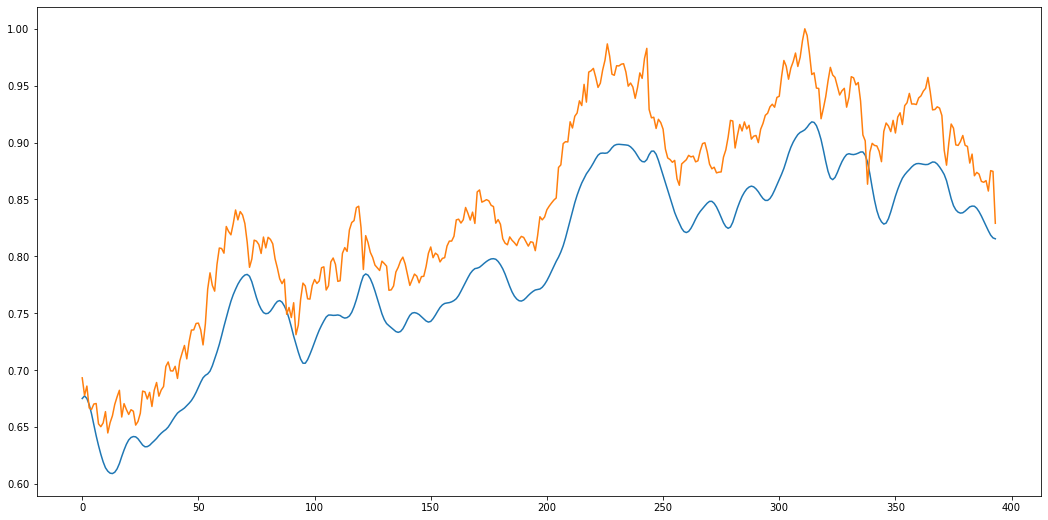

In [103]:
plt.plot(df2_preds7)
plt.plot(df2_lstm_ytest)

In [104]:
df2_lstm_ytest.shape

(394,)

In [105]:
fut_inp2=df2_lstm_ytest[294:]
fut_inp2=fut_inp2.reshape(1,-1)

In [106]:
temp_inp2=list(fut_inp2)
fut_inp2.shape

(1, 100)

In [107]:
temp_inp2=temp_inp2[0].tolist()

In [108]:
#n=int(input("Enter the number"))
lst_out2=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp2)>100):
        fut_inp2=np.array(temp_inp2[1:])
        fut_inp2=fut_inp2.reshape(1,-1)
        fut_inp2=fut_inp2.reshape((1,n_steps,1))
        yhat=df2_model7.predict(fut_inp2,verbose=0)
        temp_inp2.extend(yhat[0].tolist())
        temp_inp2=temp_inp2[1:]
        lst_out2.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp2=fut_inp2.reshape((1,n_steps,1))
        yhat=df2_model7.predict(fut_inp2,verbose=0)
        temp_inp2.extend(yhat[0].tolist())
        lst_out2.extend(yhat.tolist())
        i=i+1
               
    print(lst_out2) 

[[0.813292384147644]]
[[0.813292384147644], [0.8086166381835938]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256], [0.7921217083930969]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256], [0.7921217083930969], [0.7815588712692261]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256], [0.7921217083930969], [0.7815588712692261], [0.7702943682670593]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256], [0.7921217083930969], [0.7815588712692261], [0.7702943682670593], [0.7587988972663879]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256], [0.7921217083930969], [0.7815588712692261], [0.7702943682670593], [0.7587988972663879], [0.7474021911621094]]
[[0.813292384147644], [0.8086166381835938], [0.8013702034950256], [0.7921217083930969], [0.7815588712692261], [0.7702943682670593], [0.7587988972663879], [0.7474021911621094], [0.7363206744194031]]
[[0.813292

In [109]:
np.exp(normalizing2.inverse_transform(lst_out2))

array([[3200.09664465],
       [3181.88549095],
       [3153.86654009],
       [3118.46455773],
       [3078.51730297],
       [3036.48011867],
       [2994.17273956],
       [2952.81076845],
       [2913.14067745],
       [2875.58782143],
       [2840.36727013],
       [2807.56112274],
       [2777.16731165],
       [2749.12522189],
       [2723.32861234],
       [2699.63885756],
       [2677.88871217],
       [2657.8910034 ],
       [2639.44672057],
       [2622.34770523],
       [2606.38756129],
       [2591.36561992],
       [2577.08844109],
       [2563.38034414],
       [2550.08000927],
       [2537.04690924],
       [2524.16085111],
       [2511.32197296],
       [2498.45351457],
       [2485.49711065]])

In [110]:
plot_new2=np.arange(1,101)
plot_pred2=np.arange(101,131)

In [111]:
df2_lstm.shape,len(lst_out2)

((2475, 1), 30)

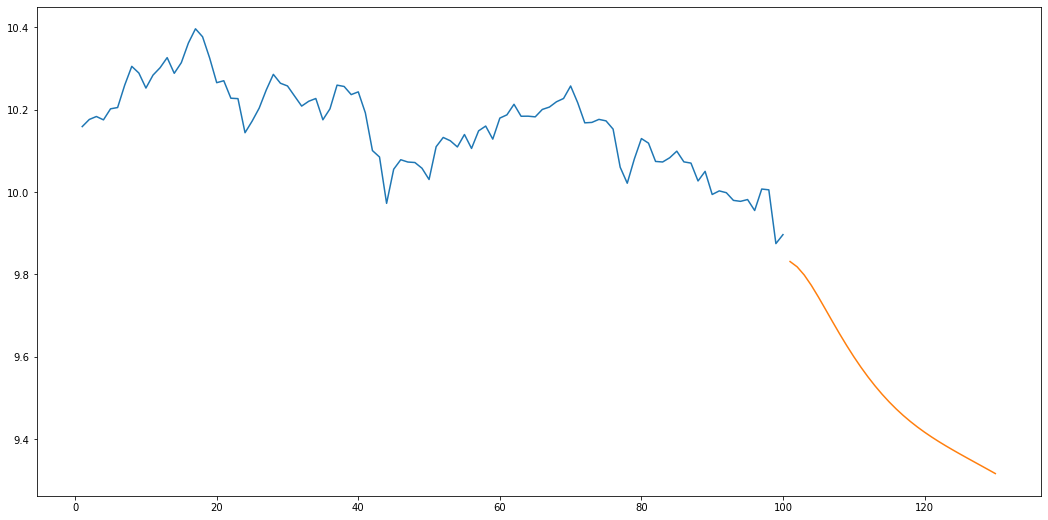

In [112]:
plt.plot(plot_new2,normalizing2.inverse_transform(np.exp(df2_lstm[2375:])))
plt.plot(plot_pred2,normalizing2.inverse_transform(np.exp(lst_out2)))

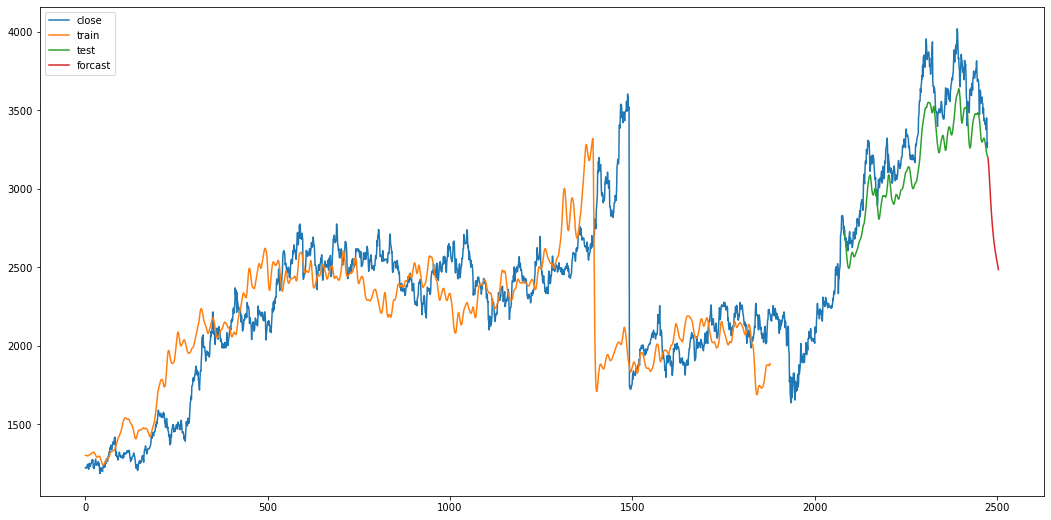

In [113]:
ranges1=np.arange(2081,2475)
ranges2=np.arange(2475,2505)
t1=np.exp(normalizing2.inverse_transform(df2_lstm))
t2=np.exp(normalizing2.inverse_transform(df2_model7.predict(df2_lstm_xtrain)))
t3=np.exp(normalizing2.inverse_transform(df2_preds7))
t4=np.exp(normalizing2.inverse_transform(lst_out2))
plt.plot(t1)
plt.plot(t2)
plt.plot(ranges1,t3)
plt.plot(ranges2,t4)
label=["close","train","test","forcast"]
plt.legend(label)

In [114]:
df2_models=dict()
df2_models["SES"]=1-df2_error1
df2_models["AES (HOLT'S)"]=1-df2_error2
df2_models["AES add(trend,sesonal)"]=1-df2_error3
df2_models["AES add(trend),mul(sesonal)"]=1-df2_error4
df2_models["AutoRegressive"]=1-df2_error5
df2_models["ARIMA"]=1-df2_error6
df2_models["LSTM"]=1-df2_error7

In [115]:
df2_models=pd.DataFrame(list(df2_models.items()),columns=["Model","Accuracy"])
df2_models

Model  Accuracy
0                          SES  0.570842
1                 AES (HOLT'S)  0.405709
2       AES add(trend,sesonal)  0.632909
3  AES add(trend),mul(sesonal)  0.633187
4               AutoRegressive  0.645785
5                        ARIMA  0.632784
6                         LSTM  0.948221

In [116]:
df2_models=df2_models.sort_values("Accuracy",ascending=False)
df2_models

Model  Accuracy
6                         LSTM  0.948221
4               AutoRegressive  0.645785
3  AES add(trend),mul(sesonal)  0.633187
2       AES add(trend,sesonal)  0.632909
5                        ARIMA  0.632784
0                          SES  0.570842
1                 AES (HOLT'S)  0.405709

<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

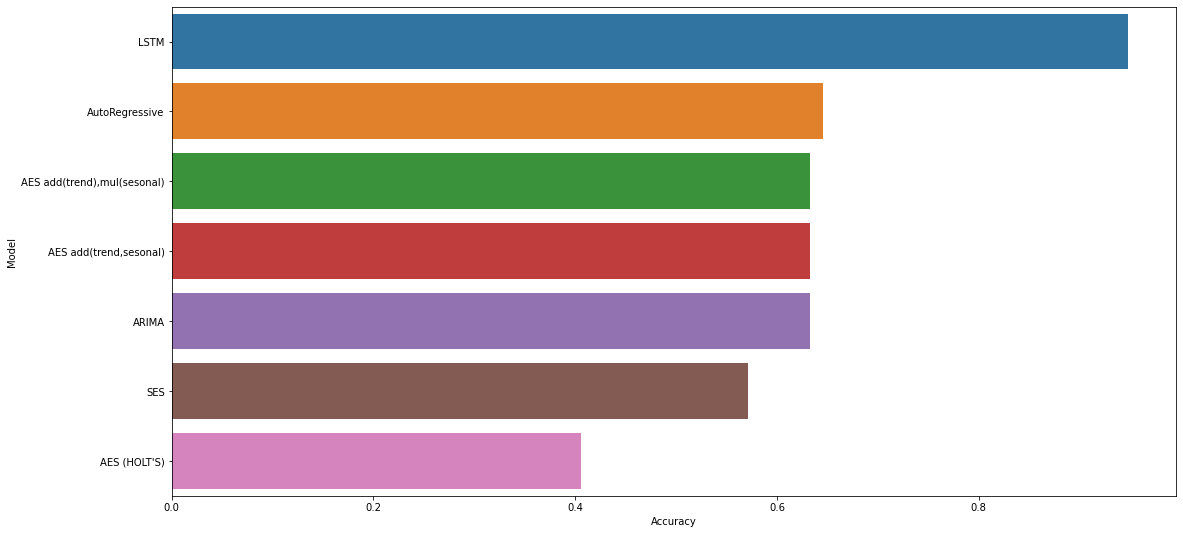

In [117]:
sns.barplot(x="Accuracy",y="Model",data=df2_models)

# Finalize Model for TCS is ( LSTM ) - supply entire data init

In [118]:
df2_x,df2_y=create_df2(df2_lstm,t_s2)
df2_x.shape,df2_y.shape

((2374, 100), (2374,))

In [119]:
df2_x=df2_x.reshape(df2_x.shape[0],df2_x.shape[1],n_features)

In [120]:
df2_model = Sequential()
df2_model.add(LSTM(50,return_sequences=True,input_shape=(df2_x.shape[1],1)))
df2_model.add(LSTM(50,return_sequences=True))
df2_model.add(LSTM(50))
df2_model.add(Dense(1,activation='linear')) 
df2_model.compile(optimizer="adam",loss="MAE")
df2_model.fit(df2_x,df2_y,epochs=10,batch_size=64)

Epoch 1/10
38/38 [==============================] - 114s 2s/step - loss: 0.1154
Epoch 2/10
38/38 [==============================] - 49s 1s/step - loss: 0.0332
Epoch 3/10
38/38 [==============================] - 43s 1s/step - loss: 0.0297
Epoch 4/10
38/38 [==============================] - 47s 1s/step - loss: 0.0286
Epoch 5/10
38/38 [==============================] - 44s 1s/step - loss: 0.0301
Epoch 6/10
38/38 [==============================] - 42s 1s/step - loss: 0.0305
Epoch 7/10
38/38 [==============================] - 34s 896ms/step - loss: 0.0290
Epoch 8/10
38/38 [==============================] - 47s 1s/step - loss: 0.0246
Epoch 9/10
38/38 [==============================] - 28s 730ms/step - loss: 0.0235
Epoch 10/10
38/38 [==============================] - 27s 708ms/step - loss: 0.0226


In [122]:
df2_y.shape

(2374,)

In [130]:
fut_inp_=df2_y[2274:]
fut_inp_=fut_inp_.reshape(1,-1)
temp_inp_=list(fut_inp_)
fut_inp_.shape

(1, 100)

In [131]:
temp_inp_=temp_inp_[0].tolist()

In [132]:
lst_out_=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_inp_)>100):
        fut_inp_=np.array(temp_inp_[1:])
        fut_inp_=fut_inp_.reshape(1,-1)
        fut_inp_=fut_inp_.reshape((1,n_steps,1))
        yhat=df2_model.predict(fut_inp_,verbose=0)
        temp_inp_.extend(yhat[0].tolist())
        temp_inp_=temp_inp_[1:]
        lst_out_.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp_=fut_inp_.reshape((1,n_steps,1))
        yhat=df2_model.predict(fut_inp_,verbose=0)
        temp_inp_.extend(yhat[0].tolist())
        lst_out_.extend(yhat.tolist())
        i=i+1
               
    print(lst_out_) 

[[0.9019671678543091]]
[[0.9019671678543091], [0.9010993242263794]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055], [0.9061229228973389]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055], [0.9061229228973389], [0.9115973114967346]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055], [0.9061229228973389], [0.9115973114967346], [0.9184635877609253]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055], [0.9061229228973389], [0.9115973114967346], [0.9184635877609253], [0.9262787103652954]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055], [0.9061229228973389], [0.9115973114967346], [0.9184635877609253], [0.9262787103652954], [0.9346750974655151]]
[[0.9019671678543091], [0.9010993242263794], [0.9025028347969055], [0.9061229228973389], [0.9115973114967346], [0.9184635877609253], [0.9262787103652954], [0.9346750974655151], [0.9433717131614685]]
[

In [133]:
np.exp(normalizing2.inverse_transform(lst_out_))

array([[3565.89350418],
       [3562.11828653],
       [3568.22571249],
       [3584.02703486],
       [3608.05521055],
       [3638.42052062],
       [3673.29307991],
       [3711.13189086],
       [3750.73468491],
       [3791.22233593],
       [3831.97585853],
       [3872.55322938],
       [3912.63904251],
       [3951.99359877],
       [3990.41764337],
       [4027.74460721],
       [4063.82539044],
       [4098.5354047 ],
       [4131.76860933],
       [4163.44986963],
       [4193.53153966],
       [4221.99335932],
       [4248.84771196],
       [4274.13866392],
       [4297.93263785],
       [4320.32496522],
       [4341.43137499],
       [4361.38294937],
       [4380.32791969],
       [4398.42134747]])

In [134]:
df2_entire_data=df2_lstm.tolist()
df2_entire_data.extend(lst_out_)

In [137]:
len(df2_entire_data)

2505

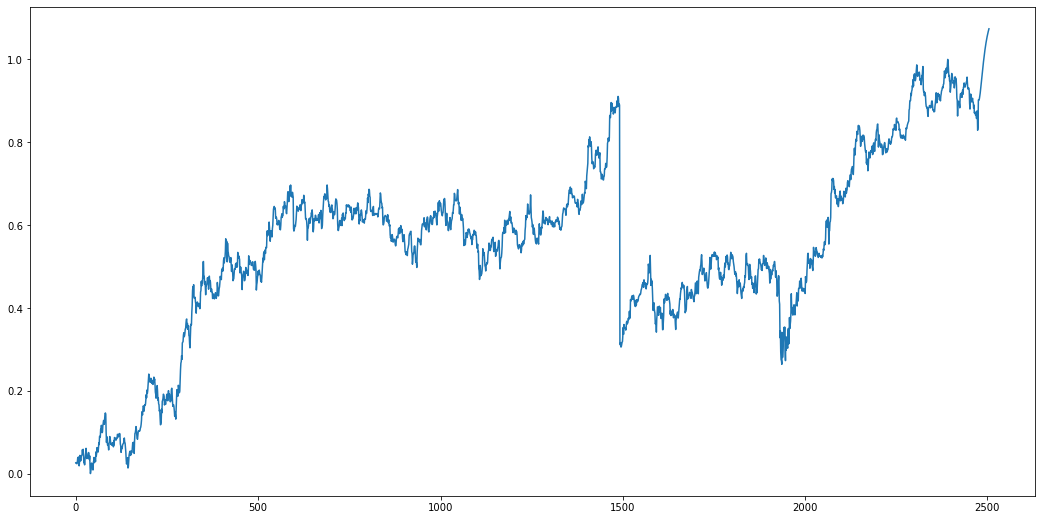

In [138]:
plt.plot(df2_entire_data)

# For Checking Purpose 

In [139]:
df2_model.save("tcs_model.h5")

In [142]:
import tensorflow

In [143]:
model = tensorflow.keras.models.load_model("tcs_model.h5")

In [145]:
p=model.predict(df2_lstm_xtest)

In [148]:
np.exp(normalizing2.inverse_transform(p))

array([[2859.5508],
       [2885.9788],
       [2898.4766],
       [2899.086 ],
       [2888.092 ],
       [2867.9966],
       [2842.7795],
       [2816.0056],
       [2788.34  ],
       [2761.1401],
       [2736.33  ],
       [2716.4355],
       [2700.362 ],
       [2688.8713],
       [2682.6921],
       [2682.774 ],
       [2689.433 ],
       [2702.3896],
       [2717.5251],
       [2733.7139],
       [2749.0708],
       [2761.9104],
       [2771.964 ],
       [2779.0261],
       [2781.8037],
       [2780.7534],
       [2777.541 ],
       [2775.6384],
       [2776.2686],
       [2778.846 ],
       [2783.429 ],
       [2787.984 ],
       [2793.2026],
       [2799.7847],
       [2806.0933],
       [2811.9453],
       [2817.413 ],
       [2824.533 ],
       [2834.0957],
       [2844.7878],
       [2855.486 ],
       [2865.7808],
       [2873.764 ],
       [2880.6704],
       [2887.7217],
       [2896.009 ],
       [2904.0005],
       [2912.808 ],
       [2923.6787],
       [2936.4573],
